# 0. Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

Customer behaviour during churn:

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

# 1. Loading dependencies & datasets

Lets start by loading our dependencies. We can keep adding any imports to this cell block, as we write mode and mode code.

In [1]:
!pip install missingno


[notice] A new release of pip is available: 22.0.4 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# To show all columns while displaying data frame
pd.set_option('display.max_columns', None)
# To avoid truncating column values
pd.set_option("display.max_colwidth", None)
# To avoid truncating rows
pd.set_option("display.max_rows", None)

Next, we load our datasets and the data dictionary file.

The **train.csv** file contains both dependent and independent features, while the **test.csv** contains only the independent variables. 

So, for model selection, I will create our own train/test dataset from the **train.csv** and use the model to predict the solution using the features in unseen test.csv data for submission.

In [3]:
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(36, 2)


In [4]:
data_dict

Acronyms  \
0     CIRCLE_ID   
1           LOC   
2           STD   
3            IC   
4            OG   
5           T2T   
6       T2M       
7       T2O       
8       T2F       
9       T2C       
10     ARPU       
11      MOU       
12      AON       
13     ONNET      
14   OFFNET       
15         ROAM   
16       SPL      
17      ISD       
18     RECH       
19      NUM       
20      AMT       
21      MAX       
22     DATA       
23       3G       
24       AV       
25      VOL       
26       2G       
27      PCK       
28    NIGHT       
29  MONTHLY       
30    SACHET      
31      *.6       
32      *.7       
33      *.8       
34      FB_USER   
35      VBC       

                                                                          Description  
0                                Telecom circle area to which the customer belongs to  
1                                             Local calls  within same telecom circle  
2                                               STD calls  outside the calling circle  
3                                                                      Incoming calls  
4                                                                      Outgoing calls  
5                            Operator T to T ie within same operator mobile to mobile  
6                                                 Operator T to other operator mobile  
7                                             Operator T to other operator fixed line  
8                                                      Operator T to fixed lines of T  
9                                                   Operator T to its own call center  
10                                                           Average revenue per user  
11                                                      Minutes of usage  voice calls  
12        Age on network  number of days the customer is using the operator T network  
13                                 All kind of calls within the same operator network  
14                                   All kind of calls outside the operator T network  
15                         Indicates that customer is in roaming zone during the call  
16                                                                      Special calls  
17                                                                          ISD calls  
18                                                                           Recharge  
19                                                                             Number  
20                                                           Amount in local currency  
21                                                                            Maximum  
22                                                                    Mobile internet  
23                                                                          G network  
24                                                                            Average  
25                                                 Mobile internet usage volume in MB  
26                                                                          G network  
27                                              Prepaid service schemes called  PACKS  
28                                     Scheme to use during specific night hours only  
29                                Service schemes with validity equivalent to a month  
30                                 Service schemes with validity smaller than a month  
31                                                          KPI for the month of June  
32                                                          KPI for the month of July  
33                                                        KPI for the month of August  
34   Service scheme to avail services of Facebook and similar social networking sites  
35  Volume based cost  when no specific scheme is not purchased and paid as per usage

In [5]:
data.columns.to_frame()

0
id                                              id
circle_id                                circle_id
loc_og_t2o_mou                      loc_og_t2o_mou
std_og_t2o_mou                      std_og_t2o_mou
loc_ic_t2o_mou                      loc_ic_t2o_mou
last_date_of_month_6          last_date_of_month_6
last_date_of_month_7          last_date_of_month_7
last_date_of_month_8          last_date_of_month_8
arpu_6                                      arpu_6
arpu_7                                      arpu_7
arpu_8                                      arpu_8
onnet_mou_6                            onnet_mou_6
onnet_mou_7                            onnet_mou_7
onnet_mou_8                            onnet_mou_8
offnet_mou_6                          offnet_mou_6
offnet_mou_7                          offnet_mou_7
offnet_mou_8                          offnet_mou_8
roam_ic_mou_6                        roam_ic_mou_6
roam_ic_mou_7                        roam_ic_mou_7
roam_ic_mou_8                        roam_ic_mou_8
roam_og_mou_6                        roam_og_mou_6
roam_og_mou_7                        roam_og_mou_7
roam_og_mou_8                        roam_og_mou_8
loc_og_t2t_mou_6                  loc_og_t2t_mou_6
loc_og_t2t_mou_7                  loc_og_t2t_mou_7
loc_og_t2t_mou_8                  loc_og_t2t_mou_8
loc_og_t2m_mou_6                  loc_og_t2m_mou_6
loc_og_t2m_mou_7                  loc_og_t2m_mou_7
loc_og_t2m_mou_8                  loc_og_t2m_mou_8
loc_og_t2f_mou_6                  loc_og_t2f_mou_6
loc_og_t2f_mou_7                  loc_og_t2f_mou_7
loc_og_t2f_mou_8                  loc_og_t2f_mou_8
loc_og_t2c_mou_6                  loc_og_t2c_mou_6
loc_og_t2c_mou_7                  loc_og_t2c_mou_7
loc_og_t2c_mou_8                  loc_og_t2c_mou_8
loc_og_mou_6                          loc_og_mou_6
loc_og_mou_7                          loc_og_mou_7
loc_og_mou_8                          loc_og_mou_8
std_og_t2t_mou_6                  std_og_t2t_mou_6
std_og_t2t_mou_7                  std_og_t2t_mou_7
std_og_t2t_mou_8                  std_og_t2t_mou_8
std_og_t2m_mou_6                  std_og_t2m_mou_6
std_og_t2m_mou_7                  std_og_t2m_mou_7
std_og_t2m_mou_8                  std_og_t2m_mou_8
std_og_t2f_mou_6                  std_og_t2f_mou_6
std_og_t2f_mou_7                  std_og_t2f_mou_7
std_og_t2f_mou_8                  std_og_t2f_mou_8
std_og_t2c_mou_6                  std_og_t2c_mou_6
std_og_t2c_mou_7                  std_og_t2c_mou_7
std_og_t2c_mou_8                  std_og_t2c_mou_8
std_og_mou_6                          std_og_mou_6
std_og_mou_7                          std_og_mou_7
std_og_mou_8                          std_og_mou_8
isd_og_mou_6                          isd_og_mou_6
isd_og_mou_7                          isd_og_mou_7
isd_og_mou_8                          isd_og_mou_8
spl_og_mou_6                          spl_og_mou_6
spl_og_mou_7                          spl_og_mou_7
spl_og_mou_8                          spl_og_mou_8
og_others_6                            og_others_6
og_others_7                            og_others_7
og_others_8                            og_others_8
total_og_mou_6                      total_og_mou_6
total_og_mou_7                      total_og_mou_7
total_og_mou_8                      total_og_mou_8
loc_ic_t2t_mou_6                  loc_ic_t2t_mou_6
loc_ic_t2t_mou_7                  loc_ic_t2t_mou_7
loc_ic_t2t_mou_8                  loc_ic_t2t_mou_8
loc_ic_t2m_mou_6                  loc_ic_t2m_mou_6
loc_ic_t2m_mou_7                  loc_ic_t2m_mou_7
loc_ic_t2m_mou_8                  loc_ic_t2m_mou_8
loc_ic_t2f_mou_6                  loc_ic_t2f_mou_6
loc_ic_t2f_mou_7                  loc_ic_t2f_mou_7
loc_ic_t2f_mou_8                  loc_ic_t2f_mou_8
loc_ic_mou_6                          loc_ic_mou_6
loc_ic_mou_7                          loc_ic_mou_7
loc_ic_mou_8                          loc_ic_mou_8
std_ic_t2t_mou_6                  std_ic_t2t_mou_6
std_ic_t2t_mou_7    

From the above list of columns, check the uniqueness of id

In [6]:
len(data.id.unique())

69999

As id is a unique value, we can set it as index

In [7]:
data = data.set_index('id')

We can see that some of the columns above are in a different format - jun_vbc_3g, aug_vbc_3g. We will rename them to match the format of the other colmns, which ends with month number.

In [8]:
data = data.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)

The dates fields will not be useful in the analysis. We can drop the date fields to reduce the complexity of the model.

In [9]:
dates = [i for i in list(data.columns) if re.search('date',i)]
data = data.drop(dates, axis=1)

Let's check the number of unique values for each columns. If we find any columns with 1 value, its not useful for analysis and can be dropped.

In [10]:
pd.DataFrame({'Unique Counts': data.nunique()}).sort_values(by='Unique Counts')

Unique Counts
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
std_ic_t2o_mou_8                1
std_ic_t2o_mou_7                1
std_ic_t2o_mou_6                1
std_og_t2c_mou_8                1
std_og_t2c_mou_7                1
std_og_t2c_mou_6                1
fb_user_8                       2
fb_user_7                       2
fb_user_6                       2
night_pck_user_8                2
night_pck_user_7                2
night_pck_user_6                2
churn_probability               2
monthly_2g_6                    5
monthly_2g_7                    6
monthly_2g_8                    6
monthly_3g_6                   10
monthly_3g_8                   12
monthly_3g_7                   13
count_rech_3g_6                23
sachet_3g_6                    23
sachet_3g_7                    26
count_rech_3g_7                27
sachet_3g_8                    28
count_rech_3g_8                29
sachet_2g_6                    30
count_rech_2g_6                30
sachet_2g_8                    32
sachet_2g_7                    33
count_rech_2g_7                33
count_rech_2g_8                33
total_rech_data_6              36
total_rech_data_7              41
total_rech_data_8              44
max_rech_data_7                45
max_rech_data_6                47
max_rech_data_8                49
spl_ic_mou_6                   78
total_rech_num_8               92
total_rech_num_6               94
spl_ic_mou_8                   95
total_rech_num_7               96
spl_ic_mou_7                  103
og_others_7                   148
last_day_rch_amt_7            166
max_rech_amt_7                178
last_day_rch_amt_6            179
og_others_8                   179
max_rech_amt_6                190
last_day_rch_amt_8            191
max_rech_amt_8                202
av_rech_amt_data_6            792
av_rech_amt_data_7            837
av_rech_amt_data_8            855
og_others_6                   914
isd_og_mou_8                 1008
isd_og_mou_7                 1084
isd_og_mou_6                 1103
ic_others_6                  1523
ic_others_8                  1565
ic_others_7                  1658
std_og_t2f_mou_8             1945
loc_og_t2c_mou_6             1945
std_og_t2f_mou_7             1991
std_og_t2f_mou_6             2074
loc_og_t2c_mou_7             2103
total_rech_amt_6             2108
total_rech_amt_7             2147
total_rech_amt_8             2149
loc_og_t2c_mou_8             2204
std_ic_t2f_mou_8             2583
std_ic_t2f_mou_6             2624
std_ic_t2f_mou_7             2695
loc_og_t2f_mou_8             3311
loc_og_t2f_mou_7             3365
loc_og_t2f_mou_6             3376
aon                          3455
spl_og_mou_6                 3503
spl_og_mou_7                 3827
spl_og_mou_8                 3848
roam_ic_mou_7                4240
roam_ic_mou_8                4252
isd_ic_mou_6                 4421
isd_ic_mou_7                 4640
isd_ic_mou_8                 4694
arpu_2g_7                    5056
arpu_2g_8                    5132
roam_og_mou_8                5215
roam_og_mou_7                5305
roam_ic_mou_6                5306
std_ic_t2t_mou_6             5323
std_ic_t2t_mou_8             5367
arpu_3g_7                    5389
arpu_2g_6                    5389
std_ic_t2t_mou_7             5479
arpu_3g_6                    5506
arpu_3g_8                    5816
loc_ic_t2f_mou_8             6092
loc_ic_t2f_mou_6             6200
loc_ic_t2f_mou_7             6287
roam_og_mou_6                6568
std_ic_t2m_mou_8             7906
std_ic_t2m_mou_6             7931
std_ic_t2m_mou_7             8033
vbc_3g_6                     9617
vol_3g_mb_6                  9768
std_ic_mou_6                 9876
std_ic_mou_8                 9939
std_ic_mou_7                10112
vbc_3g_7                    10257
vol_3g_mb_7                 10296
vbc_3g_8                    10609
vol_3g_mb_8                 10663
loc_og_t

We can drop the columns with 1 unique value

In [11]:
unique_count_df = pd.DataFrame({'Unique Counts': data.nunique()}).sort_values(by='Unique Counts')
unique_count_cols = unique_count_df[unique_count_df['Unique Counts'] == 1].index.to_list()
data = data.drop(unique_count_cols, axis=1)

We can assign the columns with two unique values as category

In [12]:
category_col_df = pd.DataFrame({'Unique Counts': data.nunique()}).sort_values(by='Unique Counts')
category_cols = unique_count_df[unique_count_df['Unique Counts'] == 2].index.to_list()
data[category_cols] = data[category_cols].astype('category')

Let's look at each variable's datatype:

In [13]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 69999 entries, 0 to 69998
Data columns (total 152 columns):
 #    Column              Dtype   
---   ------              -----   
 0    arpu_6              float64 
 1    arpu_7              float64 
 2    arpu_8              float64 
 3    onnet_mou_6         float64 
 4    onnet_mou_7         float64 
 5    onnet_mou_8         float64 
 6    offnet_mou_6        float64 
 7    offnet_mou_7        float64 
 8    offnet_mou_8        float64 
 9    roam_ic_mou_6       float64 
 10   roam_ic_mou_7       float64 
 11   roam_ic_mou_8       float64 
 12   roam_og_mou_6       float64 
 13   roam_og_mou_7       float64 
 14   roam_og_mou_8       float64 
 15   loc_og_t2t_mou_6    float64 
 16   loc_og_t2t_mou_7    float64 
 17   loc_og_t2t_mou_8    float64 
 18   loc_og_t2m_mou_6    float64 
 19   loc_og_t2m_mou_7    float64 
 20   loc_og_t2m_mou_8    float64 
 21   loc_og_t2f_mou_6    float64 
 22   loc_og_t2f_mou_7    float64 
 23   loc_og_t2f_mou

Let's also summarize the features using the df.describe method:

In [14]:
data.describe(include="all")

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count   69999.000000  69999.000000  69999.000000  67231.000000  67312.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      283.134365    278.185912    278.858826    133.153275    133.894438   
std       334.213918    344.366927    351.924315    299.963093    311.277193   
min     -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
25%        93.581000     86.714000     84.095000      7.410000      6.675000   
50%       197.484000    191.588000    192.234000     34.110000     32.280000   
75%       370.791000    365.369500    369.909000    119.390000    115.837500   
max     27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

         onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count   66296.000000  67231.000000  67312.000000  66296.000000   67231.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
mean      132.978257    198.874771    197.153383    196.543577       9.765435   
std       311.896596    316.818355    322.482226    324.089234      57.374429   
min         0.000000      0.000000      0.000000      0.000000       0.000000   
25%         6.410000     34.860000     32.240000     31.575000       0.000000   
50%        32.100000     96.480000     91.885000     91.800000       0.000000   
75%       115.060000    232.990000    227.630000    229.345000       0.000000   
max     10752.560000   8362.360000   7043.980000  14007.340000    2850.980000   

        roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count    67312.000000   66296.000000   67231.000000   67312.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         7.014568       7.004892      14.186457       9.842191   
std         55.960985      53.408135      73.469261      58.511894   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       0.000000       0.000000       0.000000   
50%          0.000000       0.000000       0.000000       0.000000   
75%          0.000000       0.000000       0.000000       0.000000   
max       4155.830000    4169.810000    3775.110000    2812.040000   

        roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count    66296.000000      67231.000000      67312.000000      66296.000000   
unique            NaN               NaN               NaN               NaN   
top               NaN               NaN               NaN               NaN   
freq              NaN               NaN               NaN               NaN   
mean         9.771783         46.904854         46.166503         45.686109   
std         64.618388        150.971758        154.739002        153.716880   
min          0.000000          0.000000          0.000000          0.000000   
25%          0.000000          1.660000          1.650000          1.610000   
50%          0.000000         11.910000         11.580000         11.740000   
75%          0.000000         40.740000         39.760000         39.895000   
max       5337.040000       6431.330000       7400.660000      10752.560000   

        loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count       67231.000000      67312.000000      66296.000000   
unique               NaN               NaN               NaN   
top                  NaN               NaN               NaN   
freq                 NaN          

In [ ]:
We can also drop unnece

# Exploratory Data Analysis & Preprocessing

Lets start by analysing the univariate distributions of each feature.

## Univariate analysis

**Age on Network**

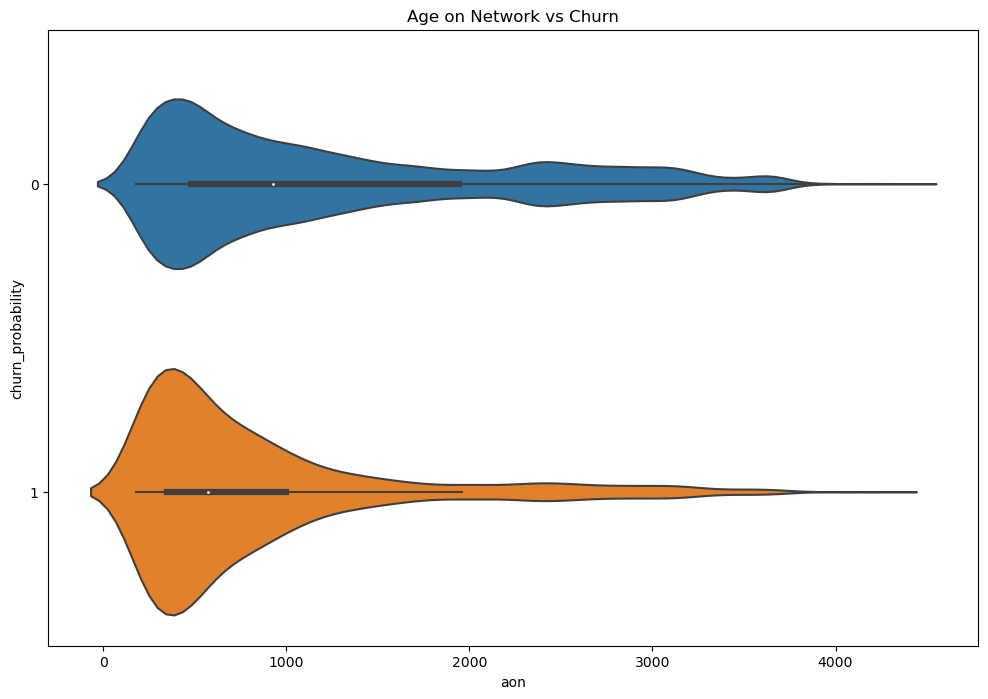

In [15]:
plt.figure(figsize=(12,8))
sns.violinplot(x=data['aon'], y=data['churn_probability'].astype('category'))
plt.title('Age on Network vs Churn')
plt.show()

From the above, in general most users are having lesser age on network. But among them, the churning usually happens if the aon is less.

In [16]:
def num_univariate_analysis(dataframe, column_names,scale='linear'):
    fig = plt.figure(figsize=(16,12))
    for idx, column_name in enumerate(column_names):
        ax = fig.add_subplot(1,len(column_names),idx + 1)
        sns.violinplot(x='churn_probability', y = column_name, data = dataframe, ax=ax)
        title = ''.join(column_name) + ' vs Churn'
        ax.set(title=title)
        if scale == 'log' :
            plt.yscale('log')
            ax.set(ylabel= column_name + '(Log Scale)')

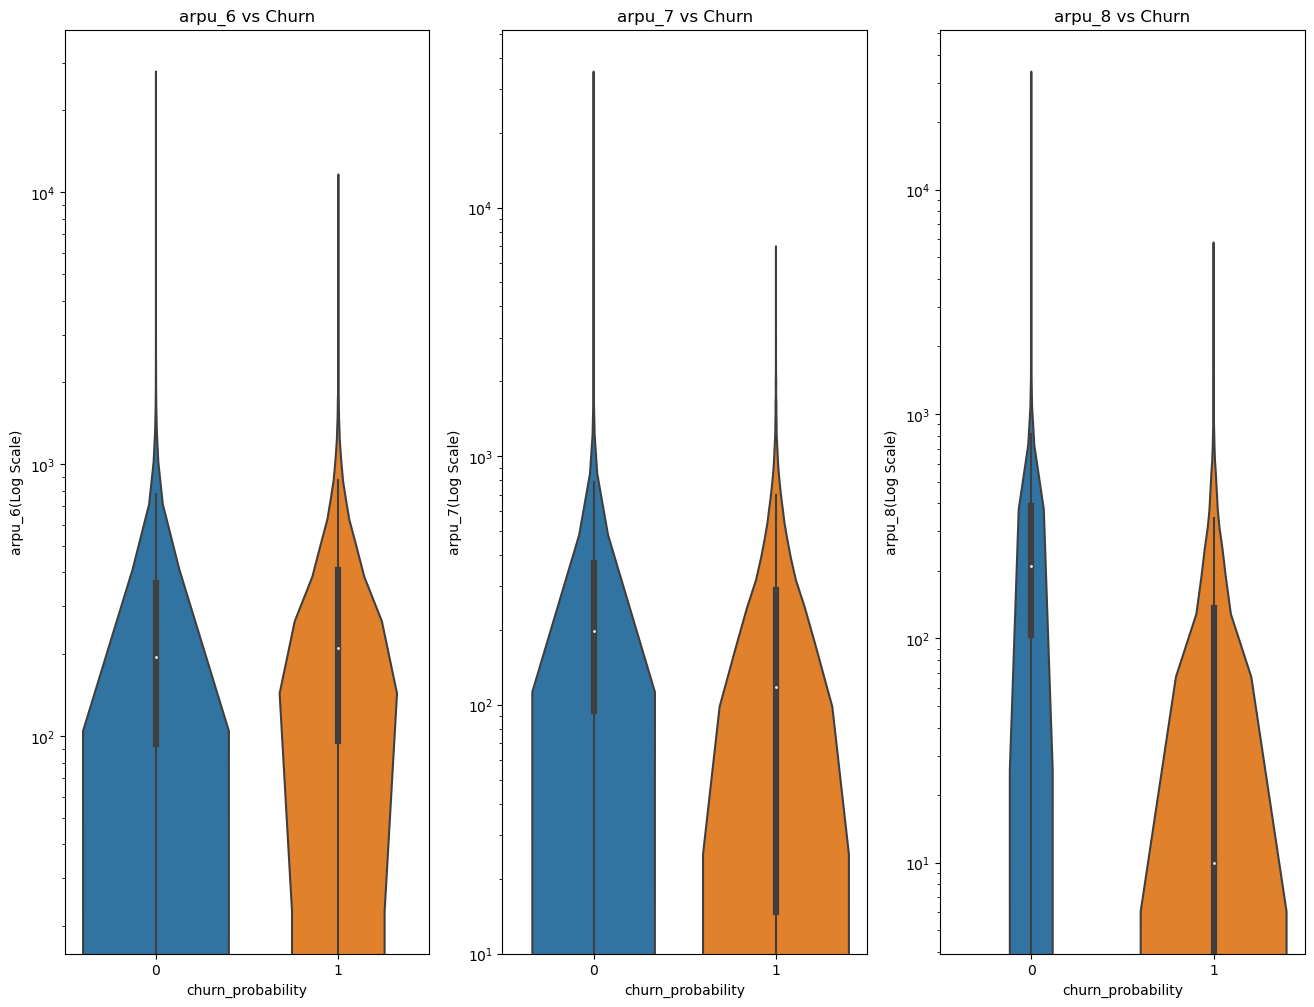

In [17]:
columns = ['arpu_6','arpu_7','arpu_8']
num_univariate_analysis(data, columns, scale='log')

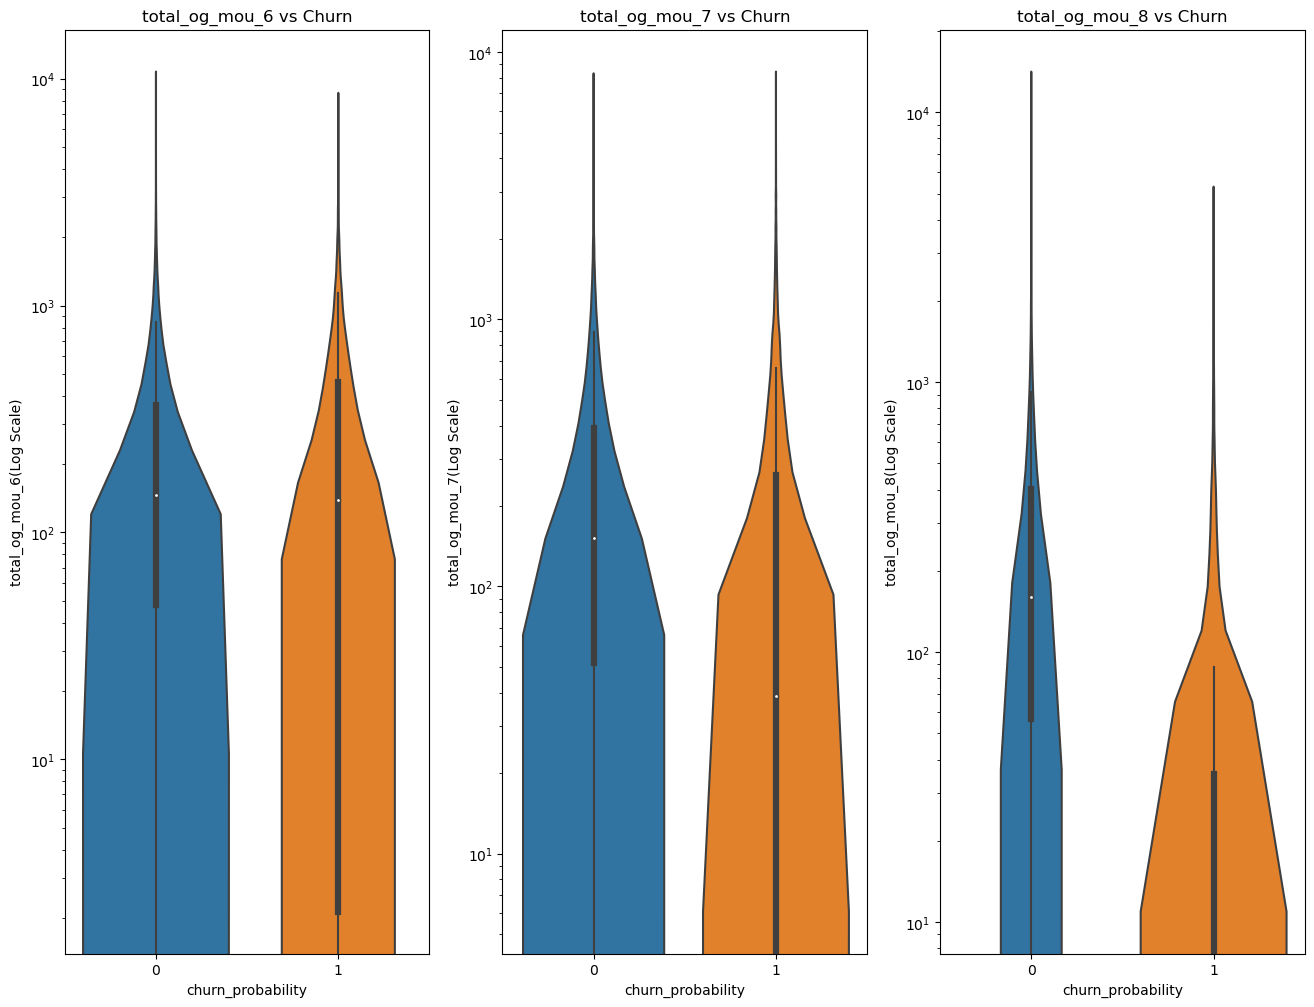

In [18]:
columns = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
num_univariate_analysis(data, columns, 'log')

## Bivariate Analysis

**'total_og_mou_6' vs 'total_og_mou_8' with respect to Churn**

<Axes: xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

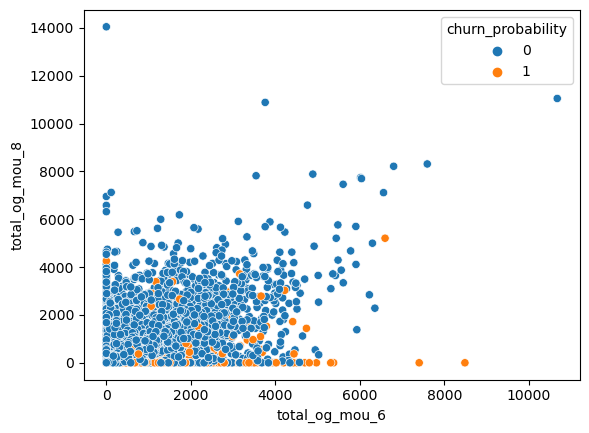

In [19]:
sns.scatterplot(x=data['total_og_mou_6'],y=data['total_og_mou_8'],hue=data['churn_probability'])

**'total_og_mou_7' vs 'total_og_mou_8' with respect to Churn**

<Axes: xlabel='total_og_mou_7', ylabel='total_og_mou_8'>

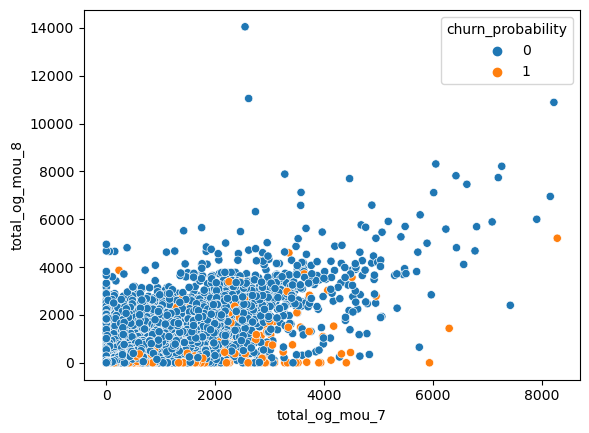

In [20]:
sns.scatterplot(x=data['total_og_mou_7'],y=data['total_og_mou_8'],hue=data['churn_probability'])

**'aon' vs 'total_og_mou_8' with respect to Churn**

<Axes: xlabel='aon', ylabel='total_og_mou_8'>

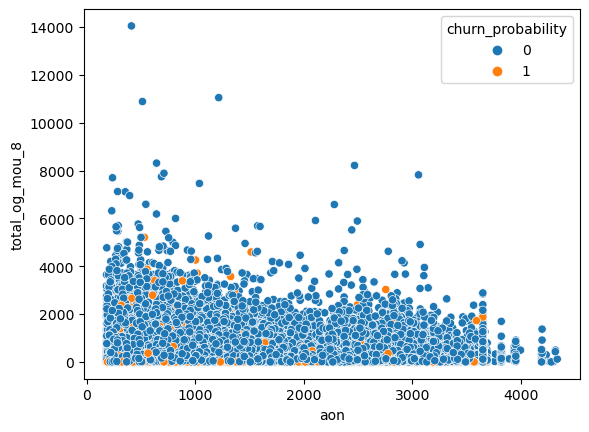

In [21]:
sns.scatterplot(x=data['aon'],y=data['total_og_mou_8'],hue=data['churn_probability'])

<Axes: xlabel='aon', ylabel='total_ic_mou_8'>

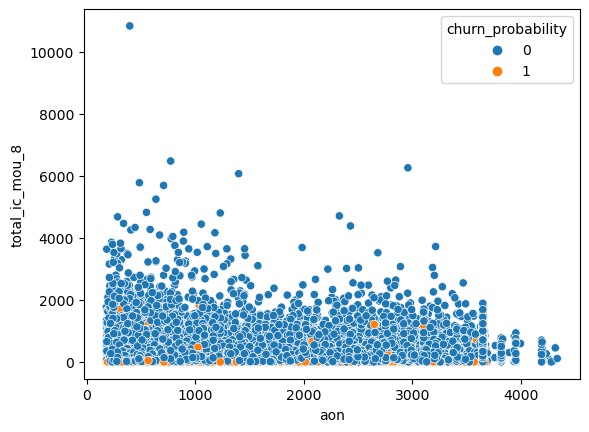

In [22]:
sns.scatterplot(x=data['aon'],y=data['total_ic_mou_8'],hue=data['churn_probability'])

**'max_rech_amt_6' vs 'max_rech_amt_8' with respect to 'Churn'**

<Axes: xlabel='max_rech_amt_6', ylabel='max_rech_amt_8'>

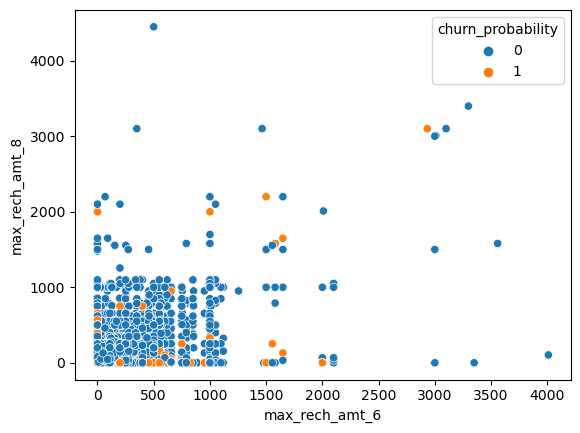

In [23]:
sns.scatterplot(x=data['max_rech_amt_6'],y=data['max_rech_amt_8'],hue=data['churn_probability'])

**Correlation Analysis**

In [24]:
# function to correlate variables
def correlation(dataframe) : 
    columnsForAnalysis = [x for x in dataframe.columns.to_list() if x != 'churn_probability']
    cor0=dataframe[columnsForAnalysis].corr()
    type(cor0)
    cor0.where(np.triu(np.ones(cor0.shape),k=1).astype(np.bool))
    cor0=cor0.unstack().reset_index()
    cor0.columns=['VAR1','VAR2','CORR']
    cor0.dropna(subset=['CORR'], inplace=True)
    cor0.CORR=round(cor0['CORR'],2)
    cor0.CORR=cor0.CORR.abs()
    cor0.sort_values(by=['CORR'],ascending=False)
    cor0=cor0[~(cor0['VAR1']==cor0['VAR2'])]

    # removing duplicate correlations
    cor0['pair'] = cor0[['VAR1', 'VAR2']].apply(lambda x: '{}-{}'.format(*sorted((x[0], x[1]))), axis=1)
    
    cor0 = cor0.drop_duplicates(subset=['pair'], keep='first')
    cor0 = cor0[['VAR1', 'VAR2','CORR']]
    return pd.DataFrame(cor0.sort_values(by=['CORR'],ascending=False))

In [25]:
# Correlations for Churn : 0  - non churn customers
# Absolute values are reported
cor_0 = correlation(data)

# filtering for correlations >= 40%
condition = cor_0['CORR'] > 0.4
cor_0 = cor_0[condition]
cor_0.style.background_gradient(cmap='GnBu')

In the first two months, which is good phase, we will find the average usage, and we will find how much the usage has reduced in the churn month.

In [26]:
def derive_variables(dataframe):
    dataframe['delta_vol_2g'] = dataframe['vol_2g_mb_8'] - dataframe['vol_2g_mb_6'].add(dataframe['vol_2g_mb_7']).div(2)
    dataframe['delta_vol_3g'] = dataframe['vol_3g_mb_8'] - dataframe['vol_3g_mb_6'].add(dataframe['vol_3g_mb_7']).div(2)
    dataframe['delta_total_og_mou'] = dataframe['total_og_mou_8'] - dataframe['total_og_mou_6'].add(dataframe['total_og_mou_7']).div(2)
    dataframe['delta_total_ic_mou'] = dataframe['total_ic_mou_8'] - dataframe['total_ic_mou_6'].add(dataframe['total_ic_mou_7']).div(2)
    dataframe['delta_vbc_3g'] = dataframe['vbc_3g_8'] - dataframe['vbc_3g_6'].add(dataframe['vbc_3g_7']).div(2)
    
    dataframe['delta_arpu'] = dataframe['arpu_8'] - dataframe['arpu_6'].add(dataframe['arpu_7']).div(2)
    dataframe['delta_total_rech_amt'] = dataframe['total_rech_amt_8'] - dataframe['total_rech_amt_6'].add(dataframe['total_rech_amt_7']).div(2)
    
    # Removing variables used for derivation : 
    dataframe.drop(columns=[
     'vol_2g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
      'vol_3g_mb_8'  , 'vol_3g_mb_6', 'vol_3g_mb_7' ,
        'total_og_mou_8','total_og_mou_6', 'total_og_mou_7', 
        'total_ic_mou_8','total_ic_mou_6', 'total_ic_mou_7',
        'vbc_3g_8','vbc_3g_6','vbc_3g_7',
        'arpu_8','arpu_6','arpu_7',
        'total_rech_amt_8', 'total_rech_amt_6', 'total_rech_amt_7'

    ], inplace=True)

In [27]:
derive_variables(data)

# Handling Missing data

First lets analyse the missing data. We can use missingno library for quick visualizations.

<Axes: >

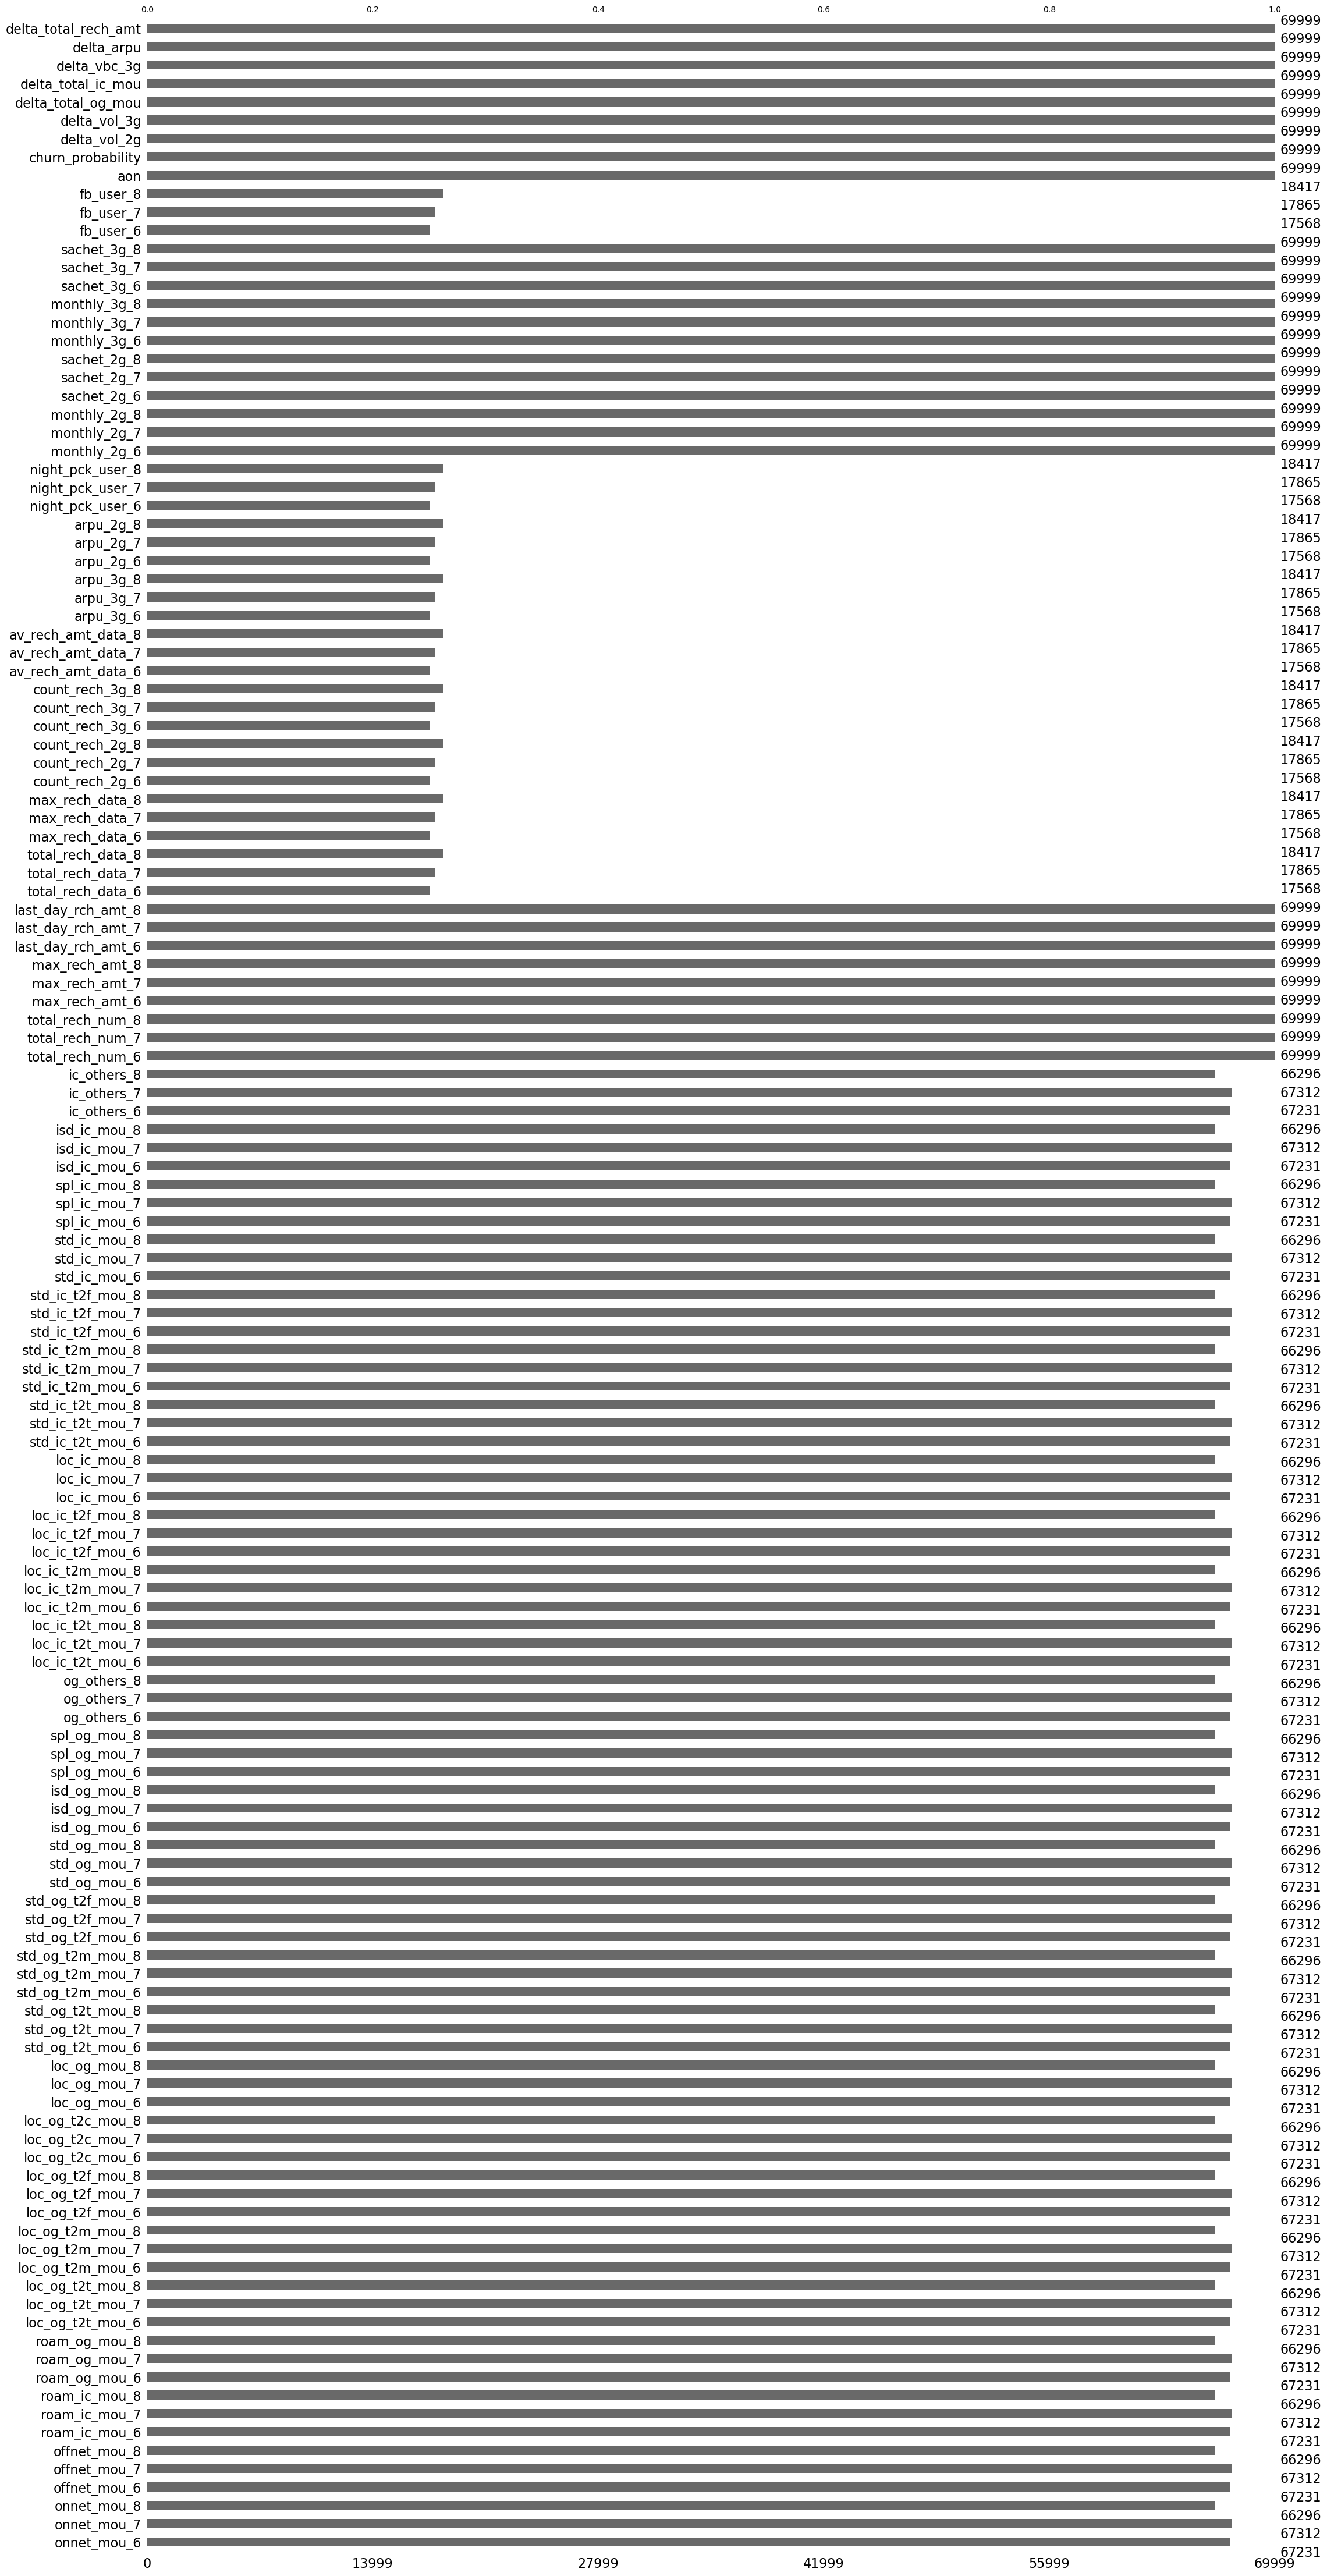

In [28]:
msno.bar(data)

<Axes: >

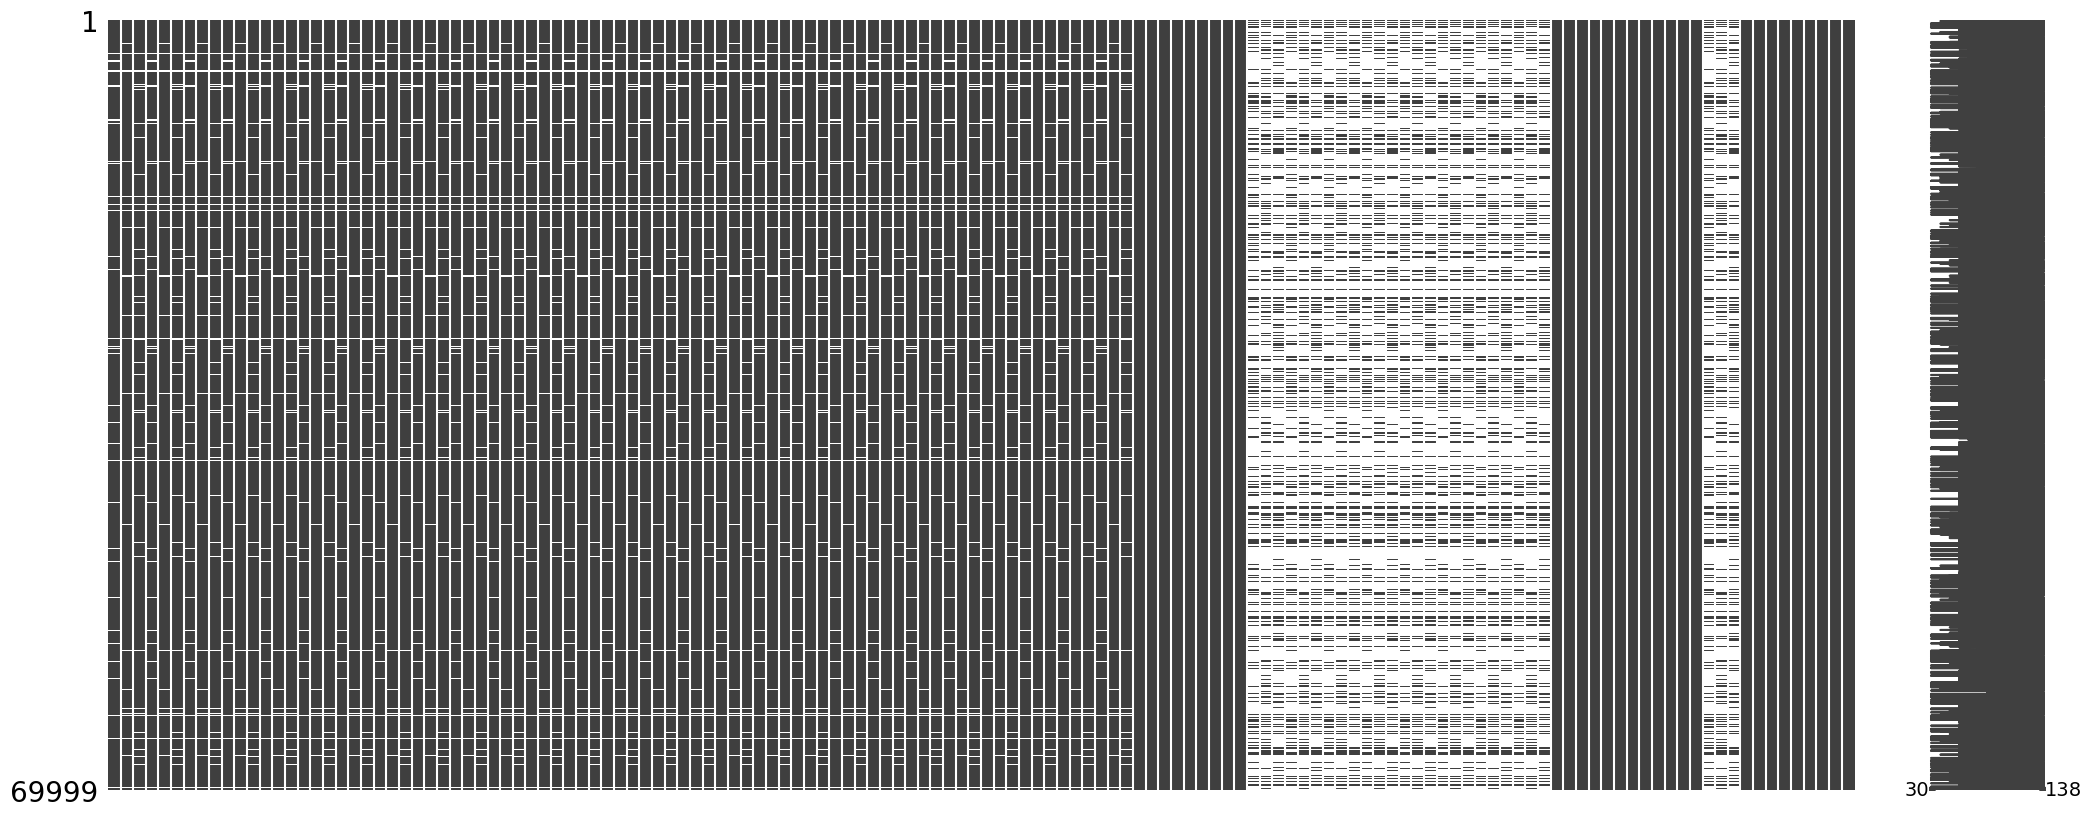

In [29]:
msno.matrix(data)

Lets also calculate the % missing data for each column:

In [30]:
missing_data_percent = 100*data.isnull().sum()/len(data)
missing_data_percent

onnet_mou_6              3.954342
onnet_mou_7              3.838626
onnet_mou_8              5.290076
offnet_mou_6             3.954342
offnet_mou_7             3.838626
offnet_mou_8             5.290076
roam_ic_mou_6            3.954342
roam_ic_mou_7            3.838626
roam_ic_mou_8            5.290076
roam_og_mou_6            3.954342
roam_og_mou_7            3.838626
roam_og_mou_8            5.290076
loc_og_t2t_mou_6         3.954342
loc_og_t2t_mou_7         3.838626
loc_og_t2t_mou_8         5.290076
loc_og_t2m_mou_6         3.954342
loc_og_t2m_mou_7         3.838626
loc_og_t2m_mou_8         5.290076
loc_og_t2f_mou_6         3.954342
loc_og_t2f_mou_7         3.838626
loc_og_t2f_mou_8         5.290076
loc_og_t2c_mou_6         3.954342
loc_og_t2c_mou_7         3.838626
loc_og_t2c_mou_8         5.290076
loc_og_mou_6             3.954342
loc_og_mou_7             3.838626
loc_og_mou_8             5.290076
std_og_t2t_mou_6         3.954342
std_og_t2t_mou_7         3.838626
std_og_t2t_mou

Since too much missing information would make a column not really a great predictor for churn, we drop these columns and keep only the ones which have less than 40% missing data.

In [31]:
new_vars = missing_data_percent[missing_data_percent.le(40)].index
new_vars

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6',
       ...
       'sachet_3g_8', 'aon', 'churn_probability', 'delta_vol_2g',
       'delta_vol_3g', 'delta_total_og_mou', 'delta_total_ic_mou',
       'delta_vbc_3g', 'delta_arpu', 'delta_total_rech_amt'],
      dtype='object', length=111)

In [32]:
data = data[new_vars]
data.shape
new_vars = [x for x in new_vars if x != 'churn_probability']

Next, we try imputation on variables with any amount of missing data still left. There are multiple ways of imputing data, and each will require a good business understanding of what the missing data is and how you may handle it.

In our case, the missing value mostly indicates there is no usage. So the missing values can be set as 0.


In [33]:
missing_data_percent = data.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

In [34]:
imp = SimpleImputer(strategy='constant', fill_value=0)
data[impute_cols] = imp.fit_transform(data[impute_cols])

<Axes: >

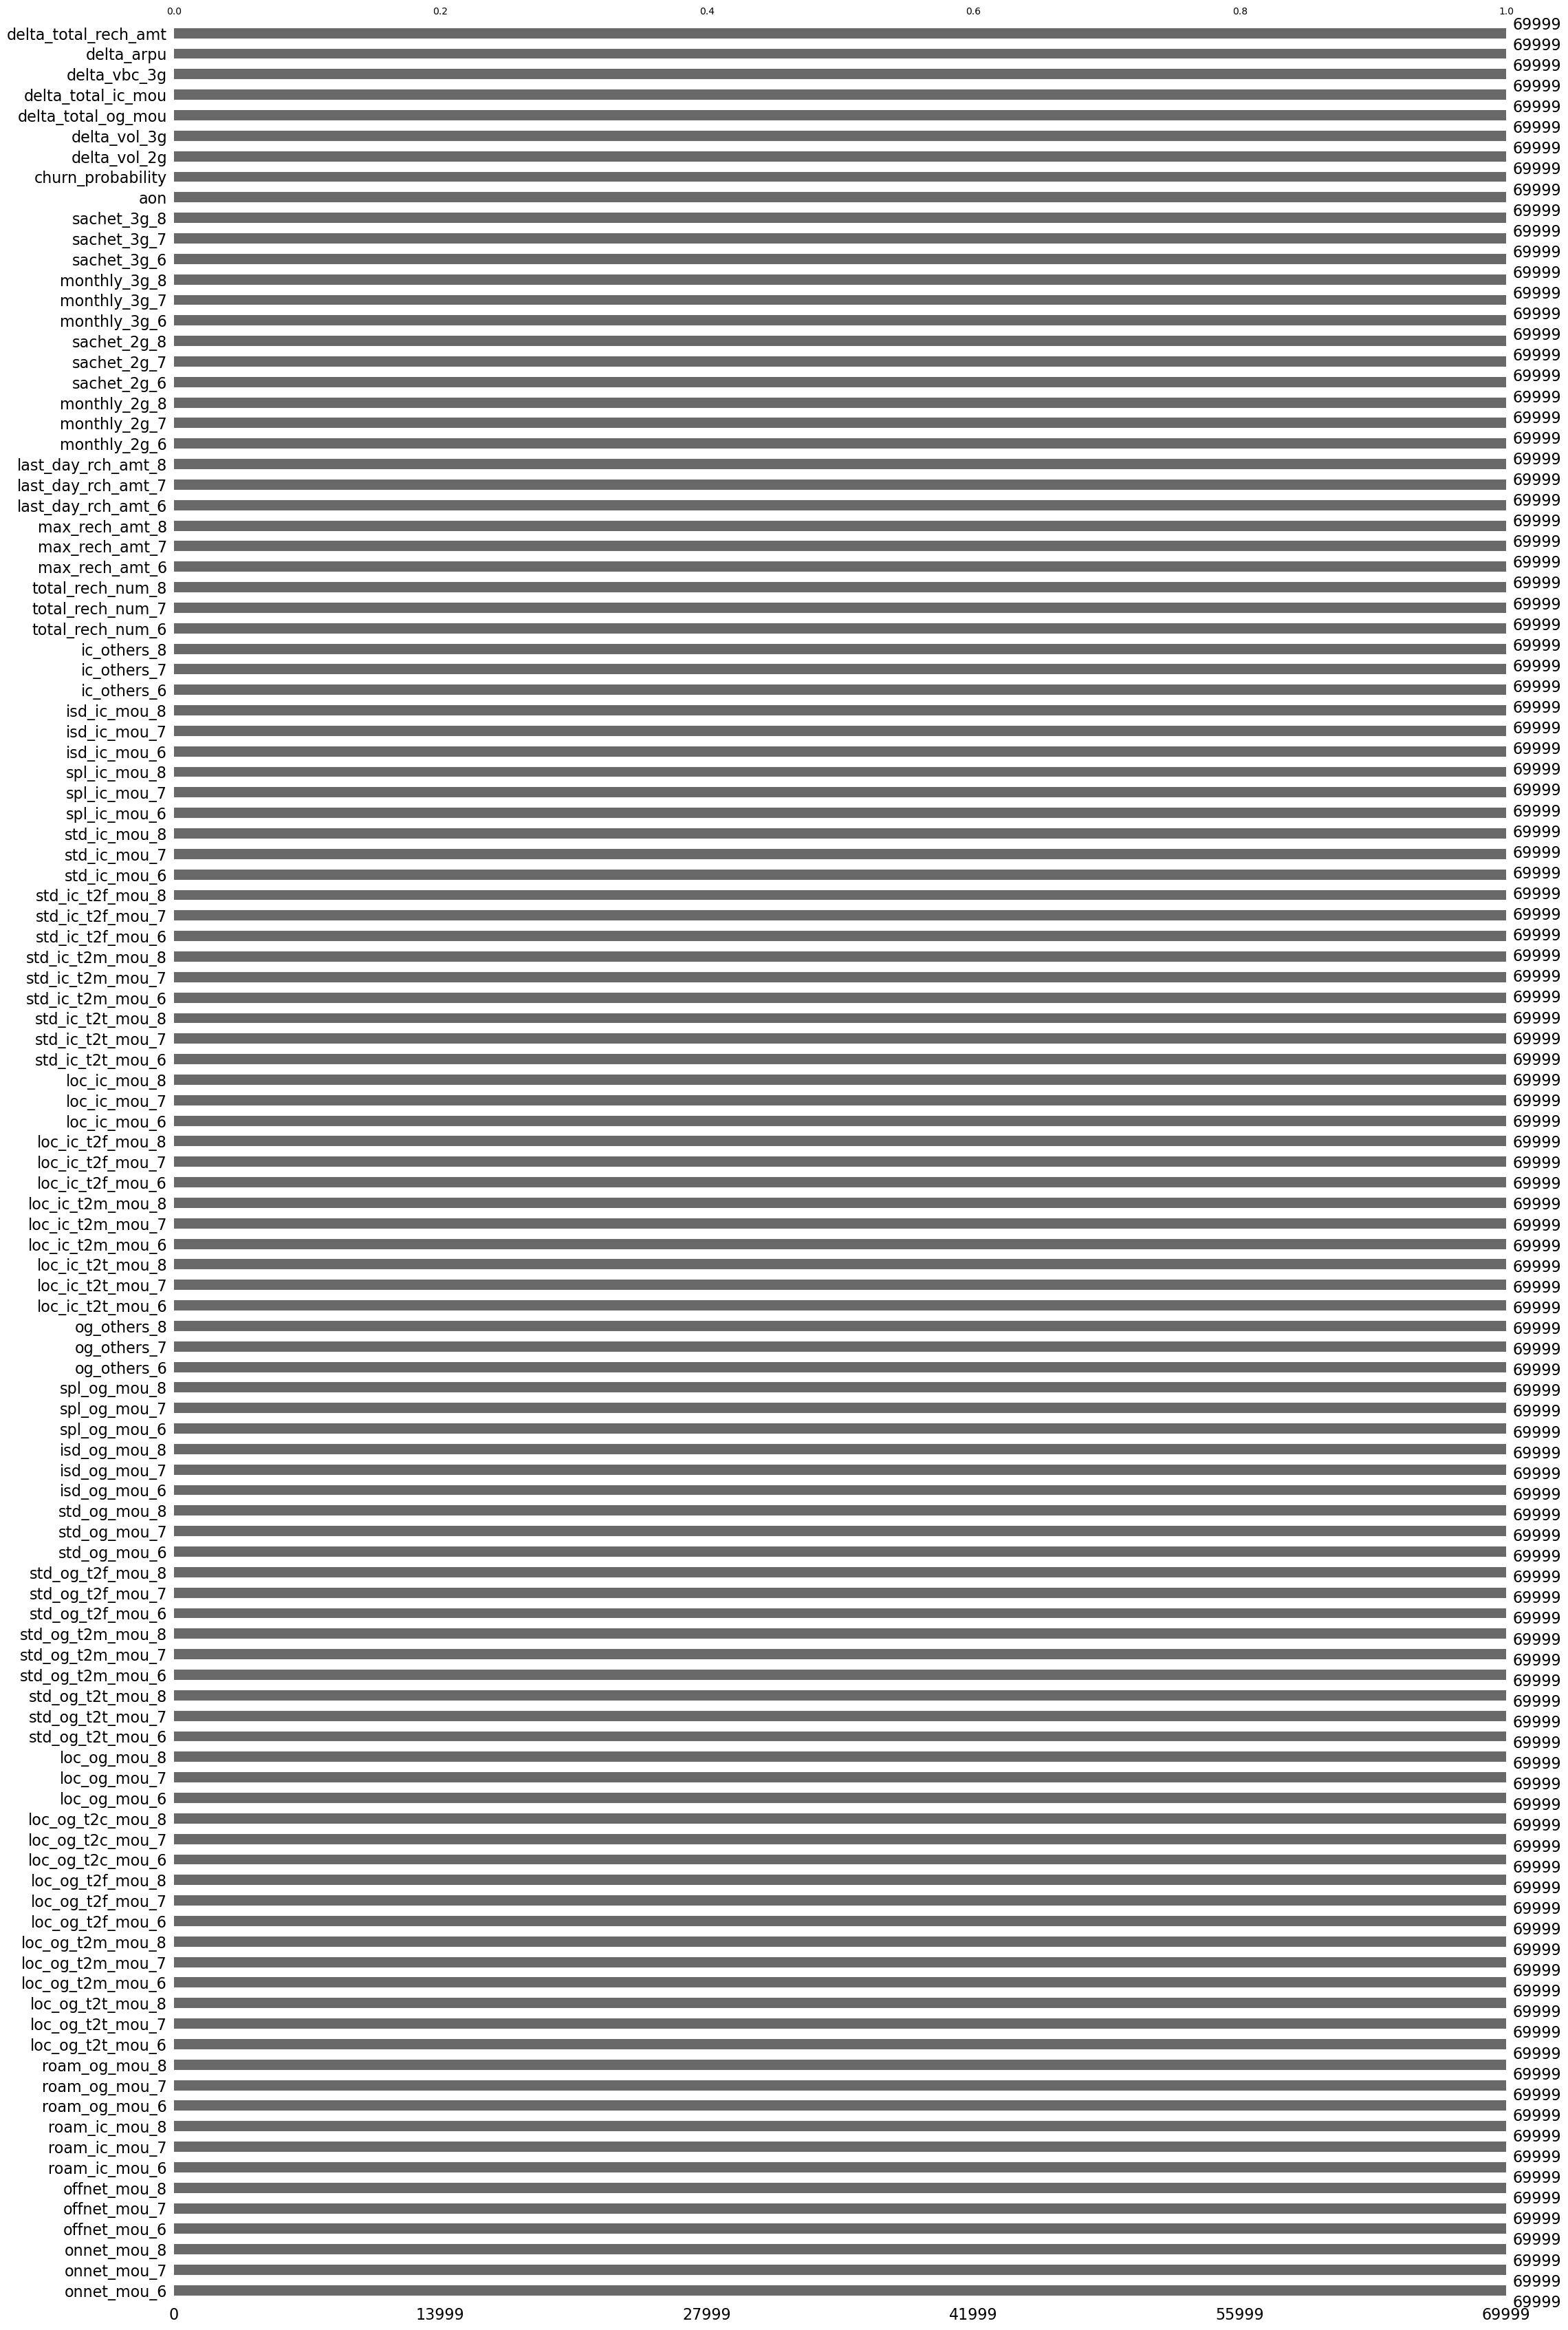

In [35]:
msno.bar(data)

In [36]:
data.describe()

onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean     127.887939    128.754731    125.943607    191.010582    189.585401   
std      295.115497    306.326345    304.990552    312.900706    318.492632   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.430000      4.910000      4.110000     28.790000     26.690000   
50%       30.830000     29.160000     27.840000     89.810000     85.590000   
75%      113.100000    108.940000    106.280000    223.540000    218.350000   
max     7376.710000   8157.780000  10752.560000   8362.360000   7043.980000   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  69999.000000   69999.000000   69999.000000   69999.000000   
mean     186.146273       9.379276       6.745305       6.634328   
std      318.453812      56.260778      54.892940      51.999899   
min        0.000000       0.000000       0.000000       0.000000   
25%       23.780000       0.000000       0.000000       0.000000   
50%       83.010000       0.000000       0.000000       0.000000   
75%      216.410000       0.000000       0.000000       0.000000   
max    14007.340000    2850.980000    4155.830000    4169.810000   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
count   69999.000000   69999.000000   69999.000000      69999.000000   
mean       13.625476       9.464386       9.254848         45.050076   
std        72.055036      57.409013      62.923987        148.238746   
min         0.000000       0.000000       0.000000          0.000000   
25%         0.000000       0.000000       0.000000          1.010000   
50%         0.000000       0.000000       0.000000         10.660000   
75%         0.000000       0.000000       0.000000         38.680000   
max      3775.110000    2812.040000    5337.040000       6431.330000   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean          44.394344         43.269280         89.551272         87.313796   
std          151.998993        149.944829        159.846546        151.875981   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.010000          0.760000          7.290000          7.530000   
50%           10.430000         10.060000         37.680000         37.010000   
75%           37.780000         37.260000        105.685000        103.330000   
max         7400.660000      10752.560000       4696.830000       4557.140000   

       loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean          86.301054          3.595161          3.632045          3.467948   
std          150.286404         13.073900         13.324919         12.686917   
min            0.000000          0.000000          0.000000          0.000000   
25%            6.440000          0.000000          0.000000          0.000000   
50%           35.940000          0.000000          0.000000          0.000000   
75%          103.110000          1.860000          1.880000          1.760000   
max         4961.330000        617.580000        815.330000        588.290000   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
count      69999.000000      69999.000000      69999.000000  69999.000000   
mean           1.081499          1.308807          1.345676    138.203540   
std            5.631416          7.765132          6.374743    248.587898   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000          0.000000     12.960000   
50%            0.000000          0.000000          0.000000     59.990000   
75%            0.000000          0.

# Handling outliers

The box plots of these features show there a lot of outliers. These can be capped with k-sigma method.

In [37]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [38]:
predictor_cols = [x for x in data.columns.to_list() if x != 'churn_probability'] 
data[predictor_cols].dtypes

onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
roam_ic_mou_6           float64
roam_ic_mou_7           float64
roam_ic_mou_8           float64
roam_og_mou_6           float64
roam_og_mou_7           float64
roam_og_mou_8           float64
loc_og_t2t_mou_6        float64
loc_og_t2t_mou_7        float64
loc_og_t2t_mou_8        float64
loc_og_t2m_mou_6        float64
loc_og_t2m_mou_7        float64
loc_og_t2m_mou_8        float64
loc_og_t2f_mou_6        float64
loc_og_t2f_mou_7        float64
loc_og_t2f_mou_8        float64
loc_og_t2c_mou_6        float64
loc_og_t2c_mou_7        float64
loc_og_t2c_mou_8        float64
loc_og_mou_6            float64
loc_og_mou_7            float64
loc_og_mou_8            float64
std_og_t2t_mou_6        float64
std_og_t2t_mou_7        float64
std_og_t2t_mou_8        float64
std_og_t2m_mou_6        float64
std_og_t

In [39]:
predictor_cols = [x for x in data.columns.to_list() if x != 'churn_probability'] 
data[predictor_cols] = data[predictor_cols].apply(cap_outliers, axis=0)
data.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
id                                                                      
0         48.58       124.38         1.29         32.24         96.68   
1          0.00         0.00         0.00          0.00         25.99   
2          0.53        15.93         0.00         53.99         82.05   
3          7.26        16.01         0.00         68.76         78.48   
4         21.28         4.83         6.13         56.99         38.11   

    offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
id                                                                             
0           2.33           0.00            0.0            0.0           0.00   
1          30.89           0.00            0.0            0.0           0.00   
2           0.00           0.00            0.0            0.0           0.00   
3          50.23           0.00            0.0            0.0           0.00   
4           9.63          53.64            0.0            0.0          15.73   

    roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
id                                                                     
0             0.0           0.00              2.23              0.00   
1             0.0           0.00              0.00              0.00   
2             0.0           0.00              0.53             12.98   
3             0.0           1.63              6.99              3.94   
4             0.0           0.00             10.16              4.83   

    loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
id                                                                           
0               0.28              5.29             16.04              2.33   
1               0.00              0.00              0.00              0.00   
2               0.00             24.11              0.00              0.00   
3               0.00             37.91             44.89             23.63   
4               6.13             36.74             19.88              4.61   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
id                                                                           
0               0.00              0.00              0.00              0.00   
1               0.00              0.00              0.00              0.00   
2               0.00              0.00              0.00              2.14   
3               0.00              0.00              0.00              0.00   
4              11.99              1.23              5.01              0.00   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
id                                                                   
0               0.00          0.000000          7.53         16.04   
1              22.01         20.469906          0.00          0.00   
2               0.00          0.000000         24.64         12.98   
3               0.00          8.030000         44.91         48.84   
4               9.85          0.000000         58.91         25.94   

    loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
id                                                                       
0           2.61             46.34            124.38              1.01   
1           0.00              0.00              0.00              0.00   
2           0.00              0.00              2.94              0.00   
3          23.63              0.26             12.06              0.00   
4          15.76              0.00              0.00              0.00   

    std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
id                                                                           
0              18.75             80.61               0.0              0.00   
1               0.00              0.00               0.0              0.00   
2         

<Axes: >

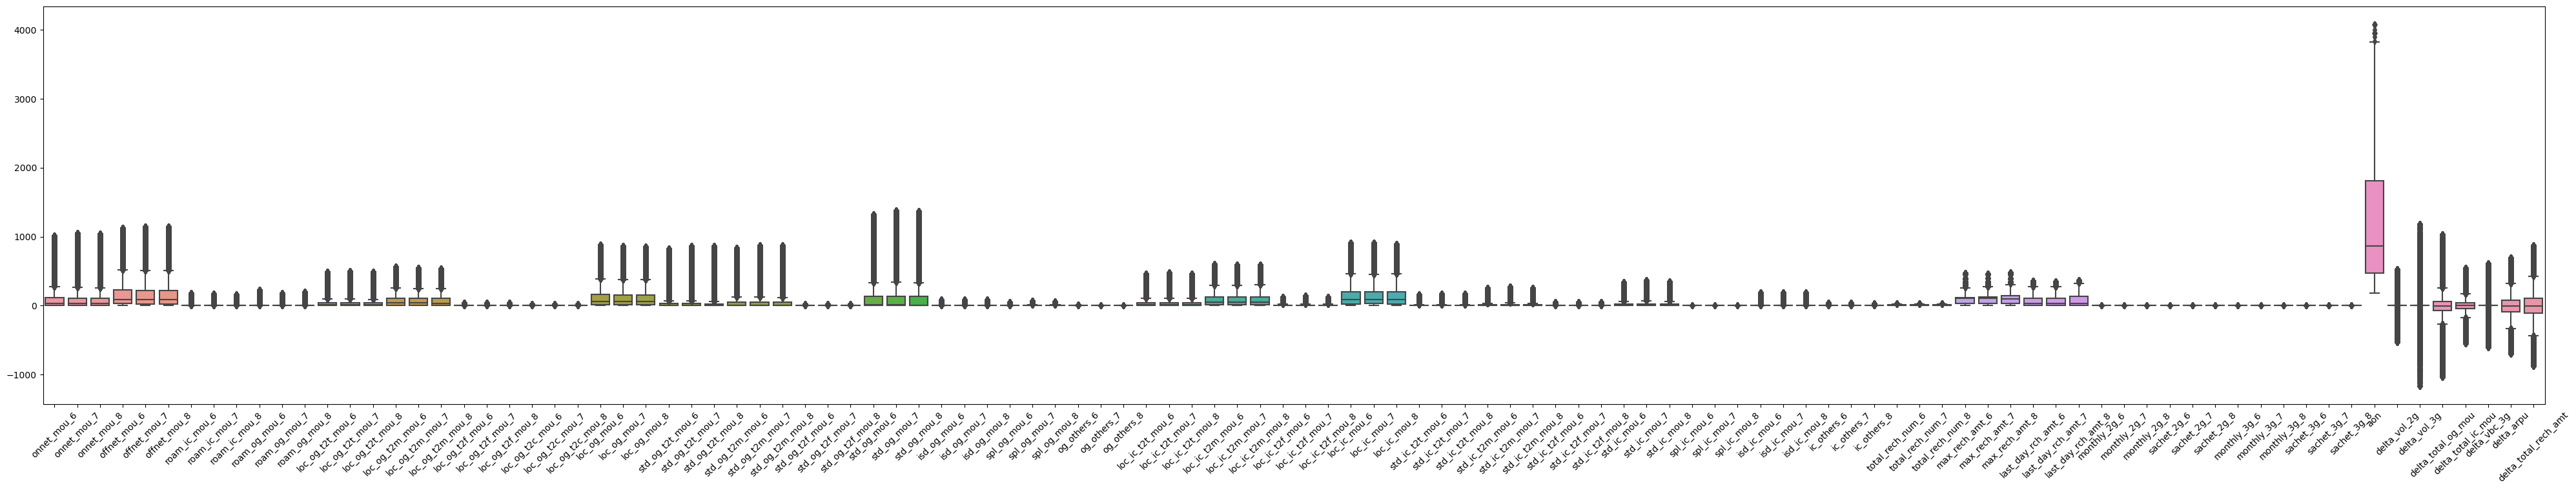

In [40]:
plt.figure(figsize=(50,8))
plt.xticks(rotation=45)
sns.boxplot(data = data)

# Split Train and Test

In [41]:
y = data['churn_probability']
X = data.drop('churn_probability', axis=1)


X.shape, y.shape

((69999, 110), (69999,))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 110), (14000, 110), (55999,), (14000,))

# Feature scaling

Lets also scale the features by scaling them with Standard scaler (few other alternates are min-max scaling and Z-scaling).

In [43]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)

<Axes: >

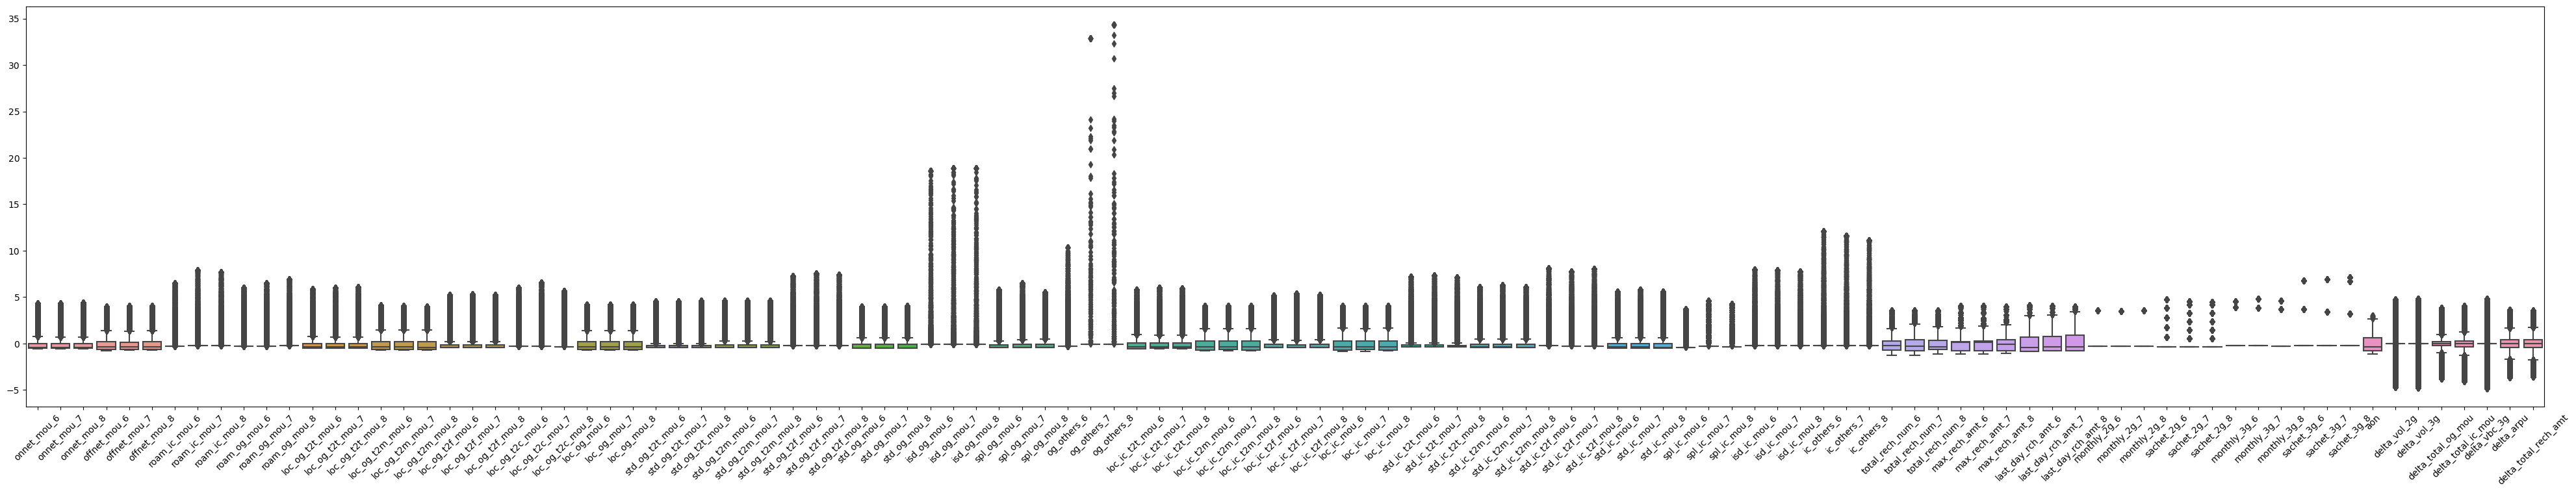

In [44]:
plt.figure(figsize=(50,8))
plt.xticks(rotation=45)
sns.boxplot(data = pd.DataFrame(X_train_scaled, columns=new_vars))

In [45]:
plt.figure(figsize=(100,100))
# sns.heatmap(pd.DataFrame(X_train_scaled, columns=new_vars).corr(), annot=True, cmap='Reds')

<Figure size 10000x10000 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

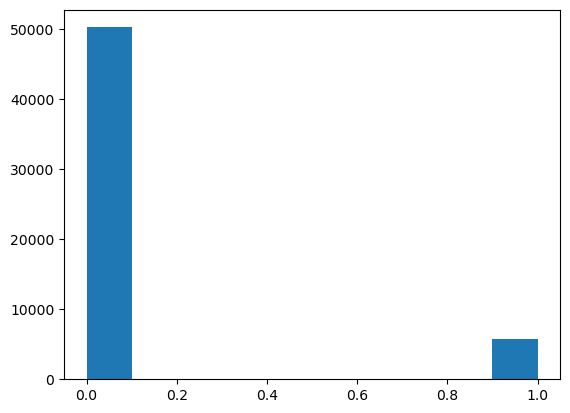

In [46]:
#Distribution for the churn probability
plt.hist(y_train)
plt.show()


# Modelling

## Logistic Regression

We will first build a simple logistic regression model

In [47]:
from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression(random_state=100, class_weight='balanced')
baseline_model = baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict_proba(X_train)[:,1]
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]

In [48]:
y_train_pred = pd.Series(y_train_pred,index = X_train.index, )
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

In [49]:
# Function for Baseline Performance Metrics
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [50]:
# Prediction at threshold of 0.5 
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [51]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[41962  8345]
 [ 1039  4653]]

Confusion Matrix for test: 
 [[10532  2028]
 [  266  1174]]


In [52]:
# Baseline Model Performance : 

print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.832
Sensitivity / True Positive Rate / Recall : 0.817
Specificity / True Negative Rate :  0.834
Precision / Positive Predictive Value : 0.358
F1-score : 0.498


Test Performance : 

Accuracy : 0.836
Sensitivity / True Positive Rate / Recall : 0.815
Specificity / True Negative Rate :  0.839
Precision / Positive Predictive Value : 0.367
F1-score : 0.506


In [53]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
id                                                     
47486    1    1    1    1    1    1    1    1    1    1
63823    1    1    1    1    1    1    1    1    0    0
48287    1    1    1    1    0    0    0    0    0    0
61785    1    1    1    1    1    1    1    1    1    1
64122    1    1    1    1    1    0    0    0    0    0

In [54]:
# # sensitivity, specificity, accuracy for each threshold
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy

# generating a data frame for metrics for each threshold
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    metrics_df.loc[len(metrics_df.index)] = [sensitivity,specificity,accuracy] 
    
metrics_df.index = thresholds
metrics_df

sensitivity  specificity  accuracy
0.0        1.000        0.000     0.102
0.1        0.969        0.319     0.385
0.2        0.936        0.477     0.523
0.3        0.909        0.614     0.644
0.4        0.867        0.735     0.748
0.5        0.817        0.834     0.832
0.6        0.682        0.900     0.878
0.7        0.467        0.944     0.895
0.8        0.282        0.969     0.900
0.9        0.122        0.987     0.899

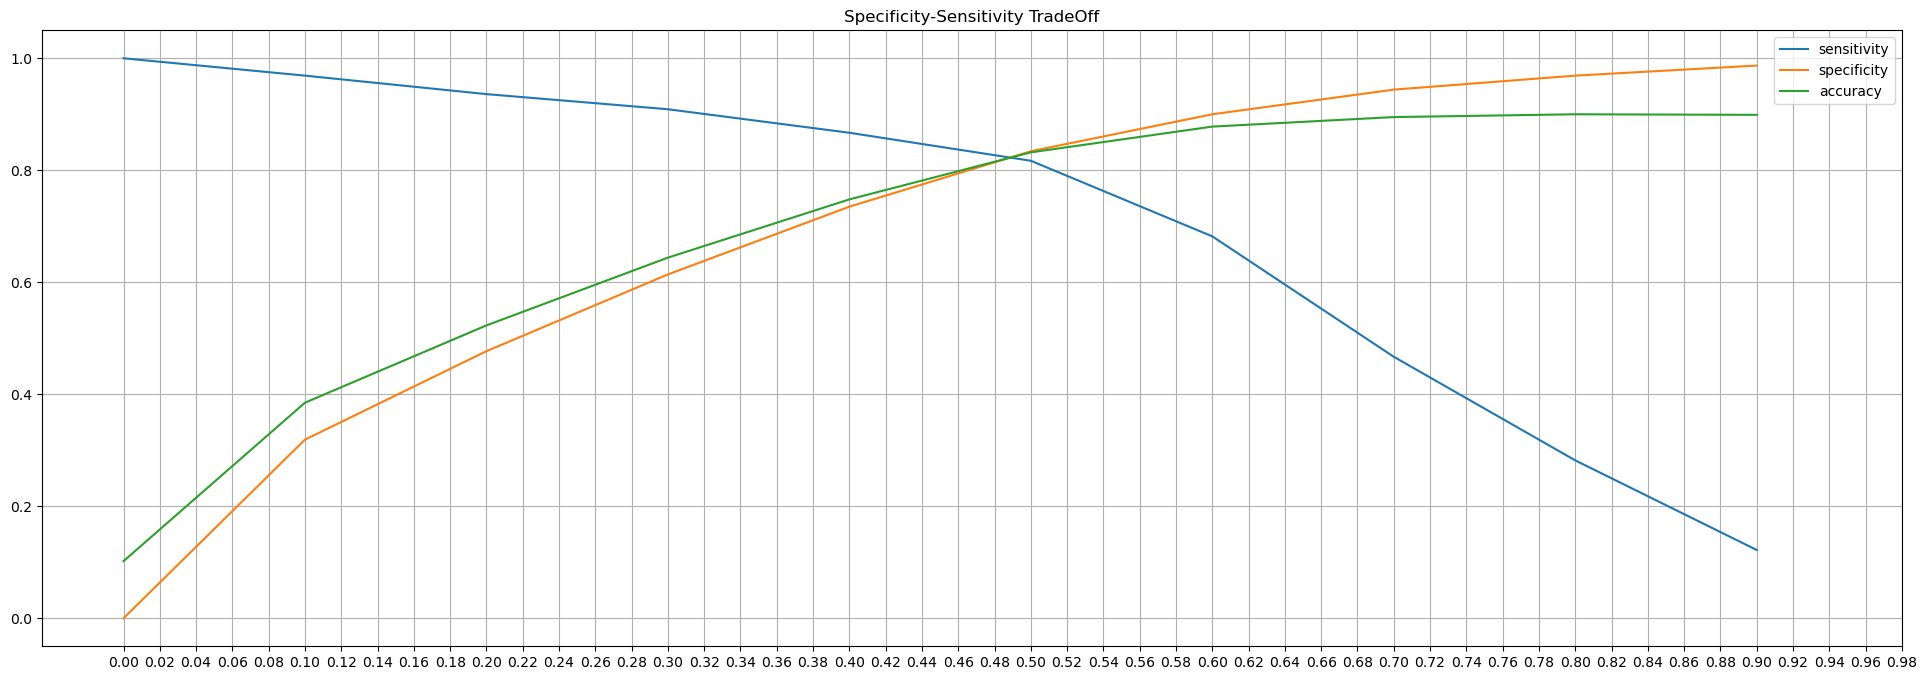

In [55]:
metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

In [56]:
optimum_cutoff = 0.49
y_train_pred_final = y_train_pred.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[41560  8747]
 [ 1007  4685]]

Confusion Matrix for test: 
 [[10437  2123]
 [  253  1187]]


In [57]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.826
Sensitivity / True Positive Rate / Recall : 0.823
Specificity / True Negative Rate :  0.826
Precision / Positive Predictive Value : 0.349
F1-score : 0.49


Test Performance : 

Accuracy : 0.83
Sensitivity / True Positive Rate / Recall : 0.824
Specificity / True Negative Rate :  0.831
Precision / Positive Predictive Value : 0.359
F1-score : 0.5


In [58]:
# ROC_AUC score 
from sklearn.metrics import roc_auc_score
print('ROC AUC score for Train : ',round(roc_auc_score(y_train, y_train_pred),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred),3) )

ROC AUC score for Train :  0.873 

ROC AUC score for Test :  0.875


In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=100 , class_weight='balanced')
rfe = RFE(lr, n_features_to_select=15)
results = rfe.fit(X_train,y_train)
results.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True,  True,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False])

In [60]:
# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : X.columns.to_list(), 'Rank' : rfe.ranking_, 
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

Column  Rank  Support
56       loc_ic_t2f_mou_8     1     True
101           sachet_3g_8     1     True
68       std_ic_t2f_mou_8     1     True
90           monthly_2g_6     1     True
92           monthly_2g_8     1     True
35       std_og_t2f_mou_8     1     True
83       total_rech_num_8     1     True
82       total_rech_num_7     1     True
81       total_rech_num_6     1     True
91           monthly_2g_7     1     True
95            sachet_2g_8     1     True
45            og_others_6     1     True
74           spl_ic_mou_8     1     True
41           isd_og_mou_8     1     True
53       loc_ic_t2m_mou_8     1     True
50       loc_ic_t2t_mou_8     2    False
59           loc_ic_mou_8     3    False
93            sachet_2g_6     4    False
11          roam_og_mou_8     5    False
94            sachet_2g_7     6    False
23       loc_og_t2c_mou_8     7    False
89     last_day_rch_amt_8     8    False
80            ic_others_8     9    False
44           spl_og_mou_8    10    False
67       std_ic_t2f_mou_7    11    False
17       loc_og_t2m_mou_8    12    False
9           roam_og_mou_6    13    False
78            ic_others_6    14    False
18       loc_og_t2f_mou_6    15    False
106    delta_total_ic_mou    16    False
22       loc_og_t2c_mou_7    17    False
10          roam_og_mou_7    18    False
77           isd_ic_mou_8    19    False
14       loc_og_t2t_mou_8    20    False
20       loc_og_t2f_mou_8    21    False
26           loc_og_mou_8    22    False
33       std_og_t2f_mou_6    23    False
84         max_rech_amt_6    24    False
29       std_og_t2t_mou_8    25    False
38           std_og_mou_8    26    False
5            offnet_mou_8    27    False
7           roam_ic_mou_7    28    False
40           isd_og_mou_7    29    False
86         max_rech_amt_8    30    False
54       loc_ic_t2f_mou_6    31    False
39           isd_og_mou_6    32    False
71           std_ic_mou_8    33    False
103          delta_vol_2g    34    False
62       std_ic_t2t_mou_8    35    False
43           spl_og_mou_7    36    False
105    delta_total_og_mou    37    False
64       std_ic_t2m_mou_7    38    False
65       std_ic_t2m_mou_8    39    False
57           loc_ic_mou_6    40    False
49       loc_ic_t2t_mou_7    41    False
61       std_ic_t2t_mou_7    42    False
51       loc_ic_t2m_mou_6    43    False
27       std_og_t2t_mou_6    44    False
30       std_og_t2m_mou_6    45    False
36           std_og_mou_6    46    False
3            offnet_mou_6    47    False
16       loc_og_t2m_mou_7    48    False
52       loc_ic_t2m_mou_7    49    False
25           loc_og_mou_7    50    False
76           isd_ic_mou_7    51    False
2             onnet_mou_8    52    False
100           sachet_3g_7    53    False
104          delta_vol_3g    54    False
60       std_ic_t2t_mou_6    55    False
58           loc_ic_mou_7    56    False
48       loc_ic_t2t_mou_6    57    False
55       loc_ic_t2f_mou_7    58    False
8           roam_ic_mou_8    59    False
21       loc_og_t2c_mou_6    60    False
32       std_og_t2m_mou_8    61    False
63       std_ic_t2m_mou_6    62    False
19       loc_og_t2f_mou_7    63    False
0             onnet_mou_6    64    False
70           std_ic_mou_7    65    False
72           spl_ic_mou_6    66    False
99            sachet_3g_6    67    False
108            delta_arpu    68    False
97           monthly_3g_7    69    False
79            ic_others_7    70    False
73           spl_ic_mou_7    71    False
107          delta_vbc_3g    72    False
34       std_og_t2f_mou_7    73    False
47            og_others_8    74    False
96           monthly_3g_6    75    False
98           monthly_3g_8    76    False
88     last_day_rch_amt_7    77    False
6           roam_ic_mou_6    78    False
42           spl_og_mou_6    79    False
4            offnet_mou_7    80    False
24           loc_og_mou_6    81    False
12       loc_og_t2t_mou_6    82    False
87     last_day_rch_amt_6    83    False
6

In [61]:
# RFE Selected columns
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

['loc_ic_t2f_mou_8',
 'sachet_3g_8',
 'std_ic_t2f_mou_8',
 'monthly_2g_6',
 'monthly_2g_8',
 'std_og_t2f_mou_8',
 'total_rech_num_8',
 'total_rech_num_7',
 'total_rech_num_6',
 'monthly_2g_7',
 'sachet_2g_8',
 'og_others_6',
 'spl_ic_mou_8',
 'isd_og_mou_8',
 'loc_ic_t2m_mou_8']

## Logistic Regression with RFE Selected Columns

We will create a model again by feature elimination using RFE

In [62]:
# Logistic Regression Model with RFE columns
import statsmodels.api as sm 


logr = sm.GLM(y_train,(sm.add_constant(X_train[rfe_selected_columns])), family = sm.families.Binomial())
logr_fit = logr.fit()
logr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55983
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13116.
Date:                Wed, 01 Nov 2023   Deviance:                       26233.
Time:                        20:45:11   Pearson chi2:                 6.70e+09
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1721
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5869      0.030    -19.583      0.000      -0.646      -0.528
loc_ic_t2f_mou_8    -0.0313      0.003    -10.254      0.000      -0.037      -0.025
sachet_3g_8         -0.5216      0.101     -5.149      0.000      -0.720      -0.323
std_ic_t2f_mou_8    -0.0526      0.009     -5.685      0.000      -0.071      -0.034
monthly_2g_6        -0.0726      0.088     -0.826      0.409      -0.245       0.100
monthly_2g_8        -1.4616      0.138    -10.588      0.000      -1.732      -1.191
std_og_t2f_mou_8    -0.0785      0.012     -6.395      0.000      -0.103      -0.054
total_rech_num_8    -0.1598      0.005    -29.655      0.000      -0.170      -0.149
total_rech_num_7     0.0243      0.004      5.954      0.000       0.016       0.032
total_rech_num_6     0.0548      0.003     16.399      0.000       0.048       0.061
monthly_2g_7        -0.3449      0.097     -3.551      0.000      -0.535      -0.155
sachet_2g_8         -0.2308      0.030     -7.725      0.000      -0.289      -0.172
og_others_6          0.0142      0.012      1.195      0.232      -0.009       0.037
spl_ic_mou_8        -7.5864      0.486    -15.624      0.000      -8.538      -6.635
isd_og_mou_8         0.0078      0.004      1.926      0.054      -0.000       0.016
loc_ic_t2m_mou_8    -0.0233      0.001    -39.089      0.000      -0.025      -0.022
====================================================================================
"""

In [63]:
# Using P-value and vif for manual feature elimination

from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X_train_resampled, logr_fit, selected_columns) : 
    vif = pd.DataFrame()
    vif['Features'] = rfe_selected_columns
    vif['VIF'] = [variance_inflation_factor(X_train_resampled[selected_columns].values, i) for i in range(X_train_resampled[selected_columns].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index('Features')
    vif['P-value'] = round(logr_fit.pvalues,4)
    vif = vif.sort_values(by = ["VIF",'P-value'], ascending = [False,False])
    return vif

vif(X_train, logr_fit, rfe_selected_columns)

VIF  P-value
Features                       
total_rech_num_7  6.52   0.0000
total_rech_num_8  5.03   0.0000
total_rech_num_6  4.45   0.0000
loc_ic_t2m_mou_8  1.85   0.0000
monthly_2g_7      1.80   0.0004
monthly_2g_6      1.67   0.4087
monthly_2g_8      1.67   0.0000
loc_ic_t2f_mou_8  1.38   0.0000
sachet_2g_8       1.32   0.0000
std_ic_t2f_mou_8  1.22   0.0000
og_others_6       1.21   0.2322
std_og_t2f_mou_8  1.16   0.0000
sachet_3g_8       1.12   0.0000
spl_ic_mou_8      1.11   0.0000
isd_og_mou_8      1.01   0.0541

In [64]:
selected_columns = rfe_selected_columns
selected_columns.remove('total_rech_num_7')
selected_columns

['loc_ic_t2f_mou_8',
 'sachet_3g_8',
 'std_ic_t2f_mou_8',
 'monthly_2g_6',
 'monthly_2g_8',
 'std_og_t2f_mou_8',
 'total_rech_num_8',
 'total_rech_num_6',
 'monthly_2g_7',
 'sachet_2g_8',
 'og_others_6',
 'spl_ic_mou_8',
 'isd_og_mou_8',
 'loc_ic_t2m_mou_8']

In [65]:
logr2 = sm.GLM(y_train,(sm.add_constant(X_train[selected_columns])), family = sm.families.Binomial())
logr2_fit = logr2.fit()
logr2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55984
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13134.
Date:                Wed, 01 Nov 2023   Deviance:                       26268.
Time:                        20:45:12   Pearson chi2:                 6.95e+09
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1716
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5585      0.030    -18.860      0.000      -0.617      -0.500
loc_ic_t2f_mou_8    -0.0313      0.003    -10.266      0.000      -0.037      -0.025
sachet_3g_8         -0.5179      0.101     -5.118      0.000      -0.716      -0.320
std_ic_t2f_mou_8    -0.0527      0.009     -5.697      0.000      -0.071      -0.035
monthly_2g_6        -0.0952      0.088     -1.085      0.278      -0.267       0.077
monthly_2g_8        -1.4800      0.138    -10.721      0.000      -1.750      -1.209
std_og_t2f_mou_8    -0.0791      0.012     -6.440      0.000      -0.103      -0.055
total_rech_num_8    -0.1465      0.005    -30.185      0.000      -0.156      -0.137
total_rech_num_6     0.0639      0.003     21.426      0.000       0.058       0.070
monthly_2g_7        -0.3124      0.097     -3.227      0.001      -0.502      -0.123
sachet_2g_8         -0.2300      0.030     -7.718      0.000      -0.288      -0.172
og_others_6          0.0128      0.012      1.077      0.281      -0.010       0.036
spl_ic_mou_8        -7.6367      0.486    -15.715      0.000      -8.589      -6.684
isd_og_mou_8         0.0074      0.004      1.836      0.066      -0.001       0.015
loc_ic_t2m_mou_8    -0.0233      0.001    -39.043      0.000      -0.024      -0.022
====================================================================================
"""

In [66]:
# vif and p-values
vif(X_train, logr2_fit, selected_columns)

VIF  P-value
Features                       
total_rech_num_8  3.34   0.0000
total_rech_num_6  3.13   0.0000
loc_ic_t2m_mou_8  1.85   0.0000
monthly_2g_7      1.79   0.0013
monthly_2g_8      1.67   0.0000
monthly_2g_6      1.66   0.2780
loc_ic_t2f_mou_8  1.38   0.0000
sachet_2g_8       1.32   0.0000
std_ic_t2f_mou_8  1.22   0.0000
og_others_6       1.21   0.2813
std_og_t2f_mou_8  1.16   0.0000
sachet_3g_8       1.12   0.0000
spl_ic_mou_8      1.11   0.0000
isd_og_mou_8      1.01   0.0664

The vif for all the fields is under 5. So we will stop iteration

In [67]:
y_train_pred_lr = logr2_fit.predict(sm.add_constant(X_train[selected_columns]))
y_train_pred_lr.head()

id
47486    0.281487
63823    0.139004
48287    0.105922
61785    0.385012
64122    0.212249
dtype: float64

In [68]:
y_test_pred_lr = logr2_fit.predict(sm.add_constant(X_test[selected_columns]))
y_test_pred_lr.head()

id
54907    0.000180
64494    0.019542
65031    0.046440
26012    0.181489
13411    0.264526
dtype: float64

### Finding Optimum Probability Cutoff

In [69]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred_lr.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
id                                                     
47486    1    1    1    0    0    0    0    0    0    0
63823    1    1    0    0    0    0    0    0    0    0
48287    1    1    0    0    0    0    0    0    0    0
61785    1    1    1    1    0    0    0    0    0    0
64122    1    1    1    0    0    0    0    0    0    0

In [70]:
# DataFrame for Performance metrics at each threshold

logr_metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    
    logr_metrics_df.loc[len(logr_metrics_df.index)] = [sensitivity,specificity,accuracy] 
    
logr_metrics_df.index = thresholds
logr_metrics_df

sensitivity  specificity  accuracy
0.0        1.000        0.000     0.102
0.1        0.859        0.733     0.746
0.2        0.780        0.863     0.855
0.3        0.624        0.943     0.910
0.4        0.328        0.983     0.916
0.5        0.134        0.994     0.907
0.6        0.057        0.998     0.902
0.7        0.022        0.999     0.900
0.8        0.000        1.000     0.898
0.9        0.000        1.000     0.898

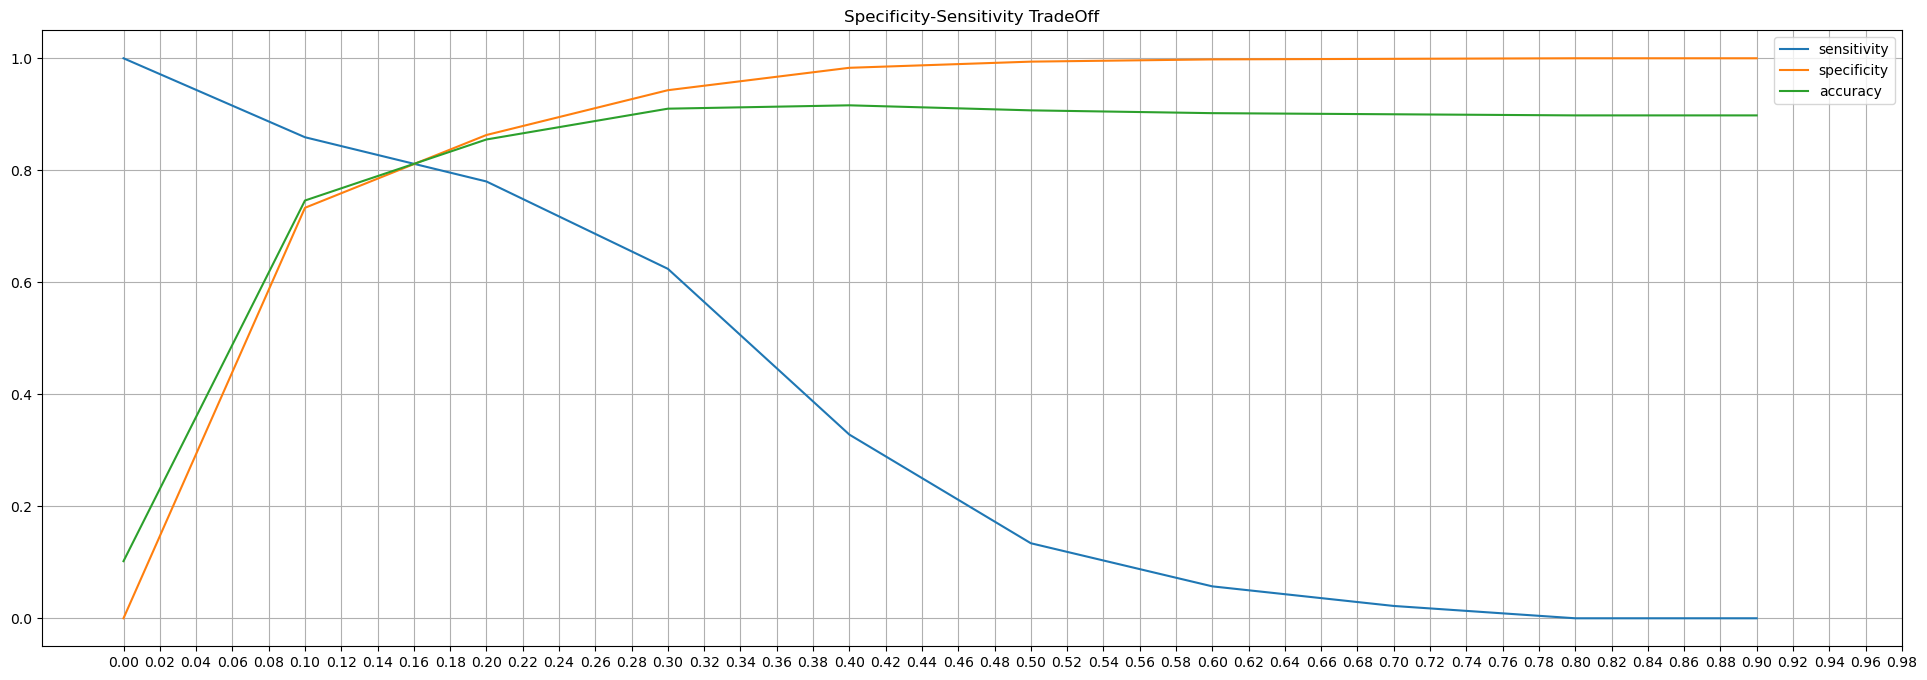

In [71]:
logr_metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

In [72]:
optimum_cutoff = 0.16
y_train_pred_lr_final = y_train_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_lr_final = y_test_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_lr_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[41258  9049]
 [ 1068  4624]]

Confusion Matrix for test: 
 [[10391  2169]
 [  294  1146]]


In [73]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.819
Sensitivity / True Positive Rate / Recall : 0.812
Specificity / True Negative Rate :  0.82
Precision / Positive Predictive Value : 0.338
F1-score : 0.477


Test Performance : 

Accuracy : 0.824
Sensitivity / True Positive Rate / Recall : 0.796
Specificity / True Negative Rate :  0.827
Precision / Positive Predictive Value : 0.346
F1-score : 0.482


In [74]:
# ROC_AUC score 
print('ROC AUC score for Train : ',round(roc_auc_score(y_train, y_train_pred_lr),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred_lr),3) )

ROC AUC score for Train :  0.885 

ROC AUC score for Test :  0.883


In [75]:
lr_summary_html = logr2_fit.summary().tables[1].as_html()
lr_results = pd.read_html(lr_summary_html, header=0, index_col=0)[0]
coef_column = lr_results.columns[0]
print('Most important predictors of Churn , in order of importance and their coefficients are as follows : \n')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

Most important predictors of Churn , in order of importance and their coefficients are as follows : 



spl_ic_mou_8       -7.6367
monthly_2g_8       -1.4800
const              -0.5585
sachet_3g_8        -0.5179
monthly_2g_7       -0.3124
sachet_2g_8        -0.2300
total_rech_num_8   -0.1465
monthly_2g_6       -0.0952
std_og_t2f_mou_8   -0.0791
total_rech_num_6    0.0639
std_ic_t2f_mou_8   -0.0527
loc_ic_t2f_mou_8   -0.0313
loc_ic_t2m_mou_8   -0.0233
og_others_6         0.0128
isd_og_mou_8        0.0074
Name: coef, dtype: float64

## PCA

In [76]:
from sklearn.decomposition import PCA 
pca = PCA(random_state = 42) 
pca.fit(X_train) # note that pca is fit on original train set instead of resampled train set. 
pca.components_

array([[-1.51250847e-02, -1.76371082e-02, -1.57436999e-02, ...,
         1.46112883e-03,  3.68663232e-03,  5.35356618e-03],
       [ 2.02887232e-01,  2.31966365e-01,  2.15278819e-01, ...,
         3.19449257e-04, -3.56350781e-03, -1.15604477e-02],
       [ 1.06530281e-02, -4.13571387e-02, -9.54010087e-02, ...,
        -6.39730204e-03, -1.30775157e-01, -1.64660765e-01],
       ...,
       [ 2.66098211e-06,  2.84826641e-05,  2.70432378e-05, ...,
        -1.43739378e-06, -3.80758407e-05,  4.18919637e-07],
       [-1.93816110e-05, -9.73370525e-06,  2.64188562e-06, ...,
         4.69571465e-07,  8.83834273e-07,  3.41997380e-05],
       [-9.98355466e-06, -1.60262972e-05, -6.74193298e-06, ...,
         2.85611004e-07, -2.05392801e-05, -5.99562153e-06]])

In [77]:
pca.explained_variance_ratio_

array([4.01723641e-01, 1.85504823e-01, 9.54638003e-02, 8.81319387e-02,
       5.35554023e-02, 2.98205496e-02, 2.30471316e-02, 1.76431302e-02,
       1.21818983e-02, 1.06127438e-02, 9.37350347e-03, 8.67752173e-03,
       7.59954517e-03, 5.31478298e-03, 5.09043760e-03, 4.54499150e-03,
       4.34926784e-03, 4.01334595e-03, 3.67220993e-03, 3.31375167e-03,
       2.91221645e-03, 2.19184499e-03, 2.00582944e-03, 1.98197756e-03,
       1.53579251e-03, 1.29136102e-03, 1.25005275e-03, 1.18339949e-03,
       1.09005242e-03, 8.16840428e-04, 7.88052781e-04, 7.80488315e-04,
       7.39901295e-04, 6.53424316e-04, 6.32625212e-04, 6.06139795e-04,
       5.71936953e-04, 5.02938219e-04, 4.87637969e-04, 4.53812995e-04,
       3.89143843e-04, 3.79024855e-04, 3.27806165e-04, 3.06068878e-04,
       2.69379714e-04, 2.31693301e-04, 1.80013051e-04, 1.59432279e-04,
       1.58384442e-04, 1.14444681e-04, 1.09227927e-04, 1.07442924e-04,
       1.04302343e-04, 9.21323220e-05, 7.86106519e-05, 7.76660740e-05,
      

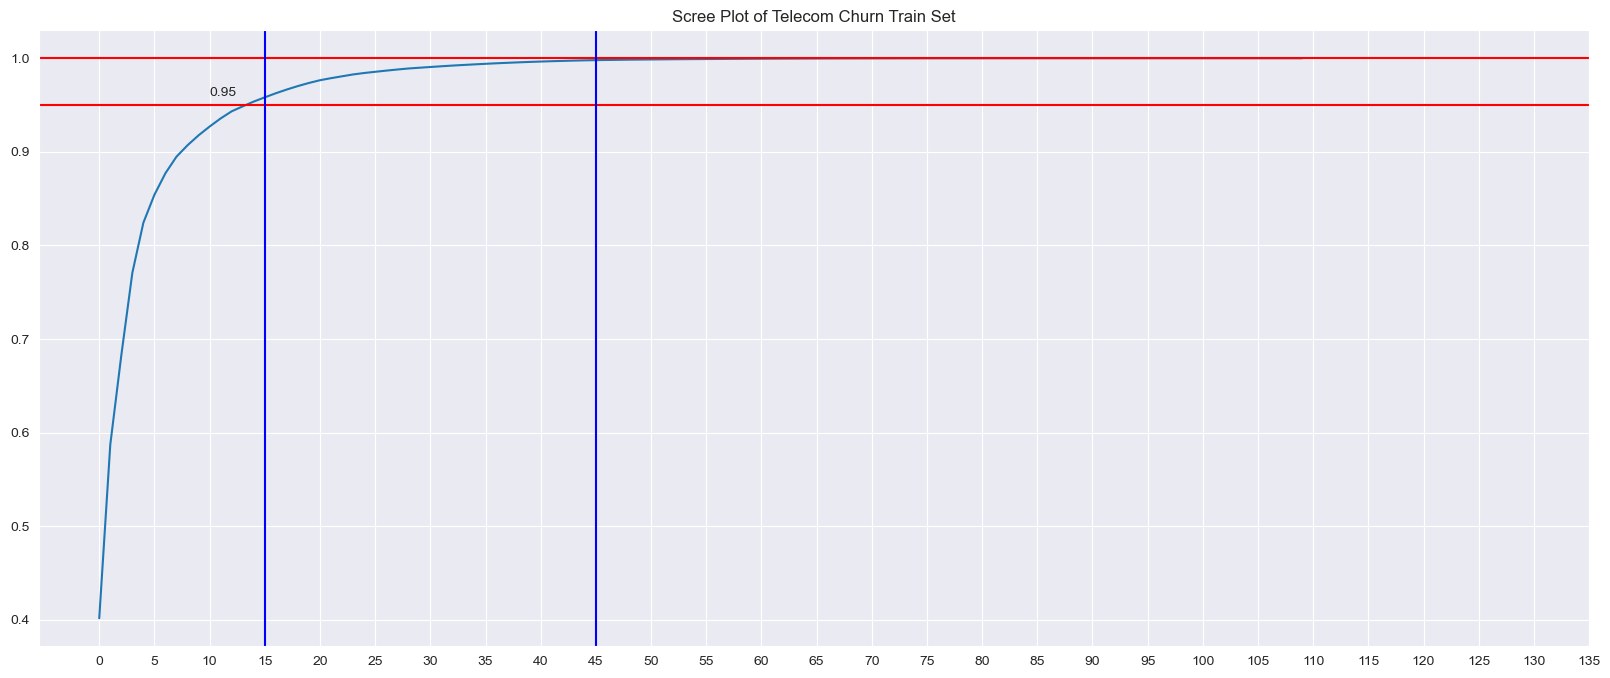

In [78]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.lineplot(var_cum)
plt.xticks(np.arange(0,140,5))
plt.axhline(0.95,color='r')
plt.axhline(1.0,color='r')
plt.axvline(15,color='b')
plt.axvline(45,color='b')
plt.text(10,0.96,'0.95')

plt.title('Scree Plot of Telecom Churn Train Set');

In [79]:
pca_final = PCA(n_components=60, random_state=42)
transformed_data = pca_final.fit_transform(X_train)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,61)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

X_test_pca = pca_final.transform(X_test)

data_train_pca.head()

PC_1        PC_2        PC_3        PC_4        PC_5  \
id                                                                  
47486 -841.370386 -249.126606   16.030025 -507.231197  257.559712   
63823 -554.649685  296.523786   21.323864 -301.479576  114.111500   
48287 -713.045579 -445.258245  -92.574037  -31.486429   85.870272   
61785 -858.729141 -156.591811  203.447551 -757.462671  119.399672   
64122  712.851303 -466.931932 -372.285784 -156.350747   69.210834   

              PC_6        PC_7        PC_8        PC_9       PC_10  \
id                                                                   
47486 -1296.676638   63.906936   35.612677 -108.972499  -25.414415   
63823    41.301253   16.442846 -763.828903 -446.456300 -371.061880   
48287    17.921459  124.807774   19.244198   -5.714269  -51.475661   
61785  -117.638993  113.119479  280.861014  189.611374  125.868181   
64122  -253.999787   27.977551   36.330016  -63.603354  -60.610446   

            PC_11      PC_12       PC_13       PC_14      PC_15      PC_16  \
id                                                                           
47486   -3.948700  24.433381   33.916984 -141.202080  57.301171 -90.933026   
63823   -4.633395   0.137513  139.084446  -19.172591 -18.209179 -56.394303   
48287  -37.300404  -7.168104   57.373420    9.144780  32.144516 -21.008582   
61785 -119.253253  25.586169  293.471104    7.921260 -41.537708  95.656359   
64122   11.202418  12.884198    3.326097 -114.233935  48.895783 -27.632019   

           PC_17       PC_18      PC_19      PC_20      PC_21       PC_22  \
id                                                                          
47486 -29.427110  140.037655  54.627182  15.917214  65.875517   44.263120   
63823 -70.617558   -3.714580  99.484981   5.903180 -56.753415  139.071164   
48287   5.201869   -9.362907 -19.786631 -10.844381  19.191860  -49.278411   
61785 -27.186927   16.372906   0.728576  23.770514 -23.081674   88.196503   
64122 -11.161513  107.823404  17.642006  -8.753819 -60.945637  -41.203895   

           PC_23      PC_24      PC_25       PC_26       PC_27      PC_28  \
id                                                                          
47486  -1.285290  36.679371 -40.239925   13.816827   85.676965 -37.468471   
63823   3.094491  91.206808  15.066812  -64.749769   22.397600 -13.136385   
48287   4.665753 -22.832534 -16.418950  -39.184522   40.855581 -54.384253   
61785  45.684937  45.036056  66.980994  122.146280 -197.311505  98.555661   
64122   8.686504  -2.103041  17.370347    1.380864  -47.200056  28.692173   

           PC_29      PC_30      PC_31      PC_32      PC_33      PC_34  \
id                                                                        
47486  -1.049745  66.594300 -43.197012  53.583214 -24.820309 -13.353423   
63823 -12.265016  50.119264 -14.607083  62.304045 -47.116587  19.940303   
48287 -14.478467  -9.807046  24.851696  20.114783  -4.154803 -24.164775   
61785 -49.285282   0.944650  73.193904  21.983034  -2.652862  -5.163190   
64122  -6.541503   4.835071   1.227679   6.513709  -2.659014  -2.703745   

           PC_35      PC_36      PC_37      PC_38      PC_39      PC_40  \
id                                                                        
47486  32.277429   4.427529 -14.027778   8.062642   5.033512   1.435097   
63823  48.016560 -17.953701 -42.154874 -56.855975 -17.737051  16.788946   
48287   8.839980  13.248769  -8.989835   7.460186 -21.881112  -4.404757   
61785  31.268893  30.691747   2.354059 -54.076643 -52.544507 -13.018667   
64122 -10.578930   6.488094   1.619426  16.087261  -1.162217  -3.111595   

           PC_41      PC_42      PC_43     PC_44      PC_45     PC_46  \
id                                                                      
47486   1.363372   7.030023   2.149326  2.827415 -13.956614 -1.378431   
63823  -3.677666  38.385788 -12.679974  5.896861 -11.188016  5.757922   
48287 -13.847743  -7.272493   4.648255  0.617289   0.830621 -3.8850

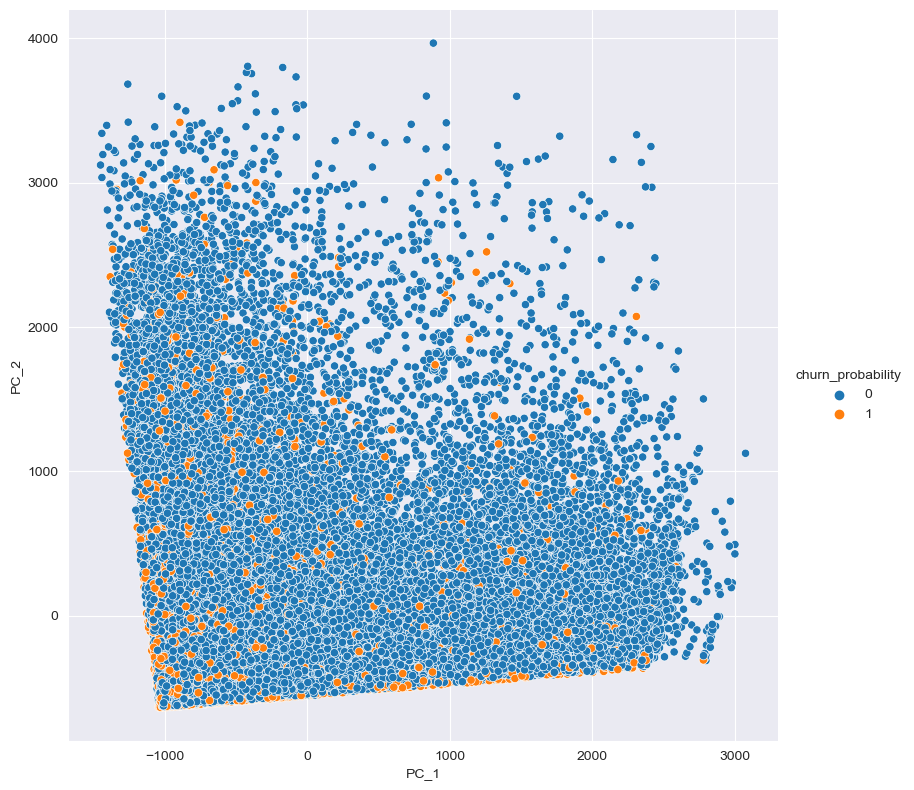

In [80]:
## Plotting principal components 
sns.pairplot(data=data_train_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "churn_probability", size=8);

# PCA + Random Forest

In [81]:
y.value_counts(normalize=True).to_frame()
# Ratio of classes 
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : 0.113


In [82]:
from sklearn.ensemble import RandomForestClassifier

# creating a random forest classifier using pca output

pca_rf = RandomForestClassifier(random_state=42, class_weight= {0 : class_1/(class_0 + class_1) , 1 : class_0/(class_0 + class_1) } , oob_score=True, n_jobs=-1,verbose=1)
pca_rf

RandomForestClassifier(class_weight={0: 0.10188716981671167,
                                     1: 0.8981128301832884},
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1)

In [83]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold
# Hyper parameter Tuning
params = {
    'n_estimators'  : [30,40,50,100],
    'max_depth' : [3,4,5,6,7],
    'min_samples_leaf' : [15,20,25,30]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=pca_rf, param_grid=params, 
                                   cv=folds, scoring='roc_auc', verbose=True, n_jobs=-1 )

pca_rf_model_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBacke

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 

[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[P

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.4

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.4s finished
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.1s remaining:  

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.7s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  3

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   10.1s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.4s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.4s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.5s finishe

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent worke

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.8s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.8s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.6s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.7s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.1s
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.7s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.1s
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.0s


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.10188716981671167,
                                                            1: 0.8981128301832884},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'n_estimators': [30, 40, 50, 100]},
             scoring='roc_auc', verbose=True)

In [84]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_rf_model_search.best_score_)
print('Best Parameters :', pca_rf_model_search.best_params_)

Best ROC-AUC score : 0.892902340906236
Best Parameters : {'max_depth': 7, 'min_samples_leaf': 15, 'n_estimators': 100}


In [85]:
# Modelling using the best PCA-RandomForest Estimator 
pca_rf_best = pca_rf_model_search.best_estimator_
pca_rf_best_fit = pca_rf_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_rf_best = pca_rf_best_fit.predict(X_train_pca)
y_train_pred_pca_rf_best[:5]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


array([1, 1, 0, 1, 0])

In [86]:
# Prediction on test set
y_test_pred_pca_rf_best = pca_rf_best_fit.predict(X_test_pca)
y_test_pred_pca_rf_best[:5]

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 0, 1])

In [87]:
## PCA - RandomForest Model Performance - Hyper Parameter Tuned

train_matrix = confusion_matrix(y_train, y_train_pred_pca_rf_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_rf_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.848
Sensitivity / True Positive Rate / Recall : 0.843
Specificity / True Negative Rate :  0.848
Precision / Positive Predictive Value : 0.386
F1-score : 0.53

Test Performance :

Accuracy : 0.842
Sensitivity / True Positive Rate / Recall : 0.795
Specificity / True Negative Rate :  0.848
Precision / Positive Predictive Value : 0.375
F1-score : 0.51


In [88]:
## out of bag error 
pca_rf_best_fit.oob_score_

0.8377292451650923

# 7. Creating submission file

For submission, we need to make sure that the format is exactly the same as the sample.csv file. It contains 2 columns, id and churn_probability

The submission file should contain churn_probability values that have to be predicted for the unseen data provided (test.csv)

In [89]:

unseen.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

Lets first select the columns that we want to work with (or create them, if you have done any feature engineering)

In [90]:
unseen = unseen.set_index('id')

In [91]:
unseen.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
id                                                                 
69999        109             0.0             0.0             0.0   
70000        109             0.0             0.0             0.0   
70001        109             0.0             0.0             0.0   
70002        109             0.0             0.0             0.0   
70003        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
id                                                                              
69999            6/30/2014            7/31/2014            8/31/2014   91.882   
70000            6/30/2014            7/31/2014            8/31/2014  414.168   
70001            6/30/2014            7/31/2014            8/31/2014  329.844   
70002            6/30/2014            7/31/2014            8/31/2014   43.550   
70003            6/30/2014            7/31/2014            8/31/2014  306.854   

        arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
id                                                                             
69999   65.330   64.445        31.78        20.23        23.11         60.16   
70000  515.568  360.868        75.51        41.21        19.84        474.34   
70001  434.884  746.239         7.54         7.86         8.40         16.98   
70002  171.390   24.400         5.31         2.16         0.00         40.04   
70003  406.289  413.329       450.93       609.03       700.68         60.94   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
id                                                                
69999         32.16         34.83           0.00           0.00   
70000        621.84        394.94           0.00           0.00   
70001         45.81         45.04          22.81         103.38   
70002        205.01         24.01           0.00           0.00   
70003         23.84         74.16           0.00           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
id                                                                  
69999           0.00           0.00           0.00           0.00   
70000           0.00           0.00           0.00           0.00   
70001          26.08          24.53          53.68          54.44   
70002           0.00           0.00           0.00           0.00   
70003           0.00           0.00           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
id                                                                              
69999             24.88             20.23             21.06             18.13   
70000             75.51             41.21             19.84            473.61   
70001              0.00              0.00              0.00              0.00   
70002              5.31              0.00              0.00              2.94   
70003              0.45              0.78             14.56              2.39   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
id                                                                              
69999             10.89              8.36              0.00             13.58   
70000            598.08            377.26              0.73              0.00   
70001              0.00              0.00              0.00              0.00   
70002             98.61             20.51              0.00              0.00   
70003              2.66             10.94              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
id                                                                              
69999              0.00               0.0              0.00              0.03   
70000              0.00               0.0              0.00         

In [92]:
unseen = unseen.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)
derive_variables(unseen)

Next, lets create a new column in the unseen dataset called churn_probability and use the model pipeline to predict the probabilities for this data

In [93]:

unseen[impute_cols] = imp.transform(unseen[impute_cols])


In [94]:
X_train.columns.to_list()

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

In [95]:
unseen.columns.to_list()

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_o

In [96]:
unseen_filtered = unseen[X_train.columns.to_list()]
X_unseen = scale.transform(unseen_filtered)

In [97]:
X_unseen_pca = pca_final.transform(X_unseen)

In [98]:
unseen['churn_probability'] = pca_rf_best.predict(X_unseen_pca)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


In [99]:
output = unseen.reset_index()[['id', 'churn_probability']]

In [100]:
output.to_csv('submission.csv', index=False)

In [101]:
output.shape

(30000, 2)